# **LOAD   LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, TomekLinks
from imblearn.over_sampling import ADASYN


# **DATA PREPARATION**

In [ ]:
df = pd.read_csv('/content/sample_data/C&T train dataset (1).csv', usecols=['sno','acc_info','duration_month','credit_history','purpose','savings_acc','employment_st','personal_status','gurantors','resident_since','property_type','installment_type','housing_type','credits_no','job_type','liables','Group_no'])

print(df)


     sno acc_info  duration_month credit_history purpose savings_acc  \
0      1      A11               6            A34     A43         A65   
1      2      A12              48            A32     A43         A61   
2      3      A14              12            A34     A46         A61   
3      4      A11              42            A32     A42         A61   
4      5      A11              24            A33     A40         A61   
..   ...      ...             ...            ...     ...         ...   
795  796      A14               9            A32     A42         A62   
796  797      A11              18            A32     A41         A65   
797  798      A14              12            A34     A42         A61   
798  799      A14              24            A33     A40         A65   
799  800      A12               9            A32     A40         A65   

    employment_st personal_status gurantors  resident_since property_type  \
0             A75             A93      A101               

# **ENCODING**

In [ ]:
# Convert categorical variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

print(df)
# Drop rows with missing value
df.dropna(inplace=True)

# Ensure that the target variable starts from 0
df['Group_no'] -= df['Group_no'].min()

     sno  acc_info  duration_month  credit_history  purpose  savings_acc  \
0      1         0               6               4        4            4   
1      2         1              48               2        4            0   
2      3         3              12               4        7            0   
3      4         0              42               2        3            0   
4      5         0              24               3        0            0   
..   ...       ...             ...             ...      ...          ...   
795  796         3               9               2        3            1   
796  797         0              18               2        1            4   
797  798         3              12               4        3            0   
798  799         3              24               3        0            4   
799  800         1               9               2        0            4   

     employment_st  personal_status  gurantors  resident_since  property_type  \
0     

# ***EXPLORATORY DATA ANALYSIS***

Box Plot of Duration Month by Group_no


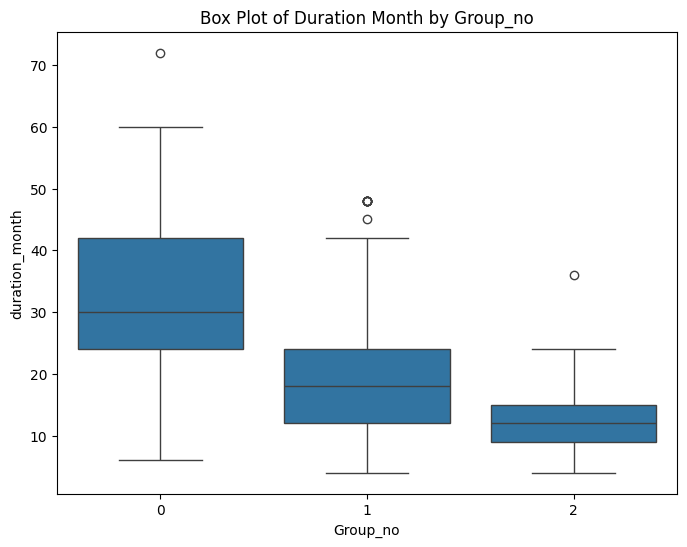

pair plot with color-coded classes


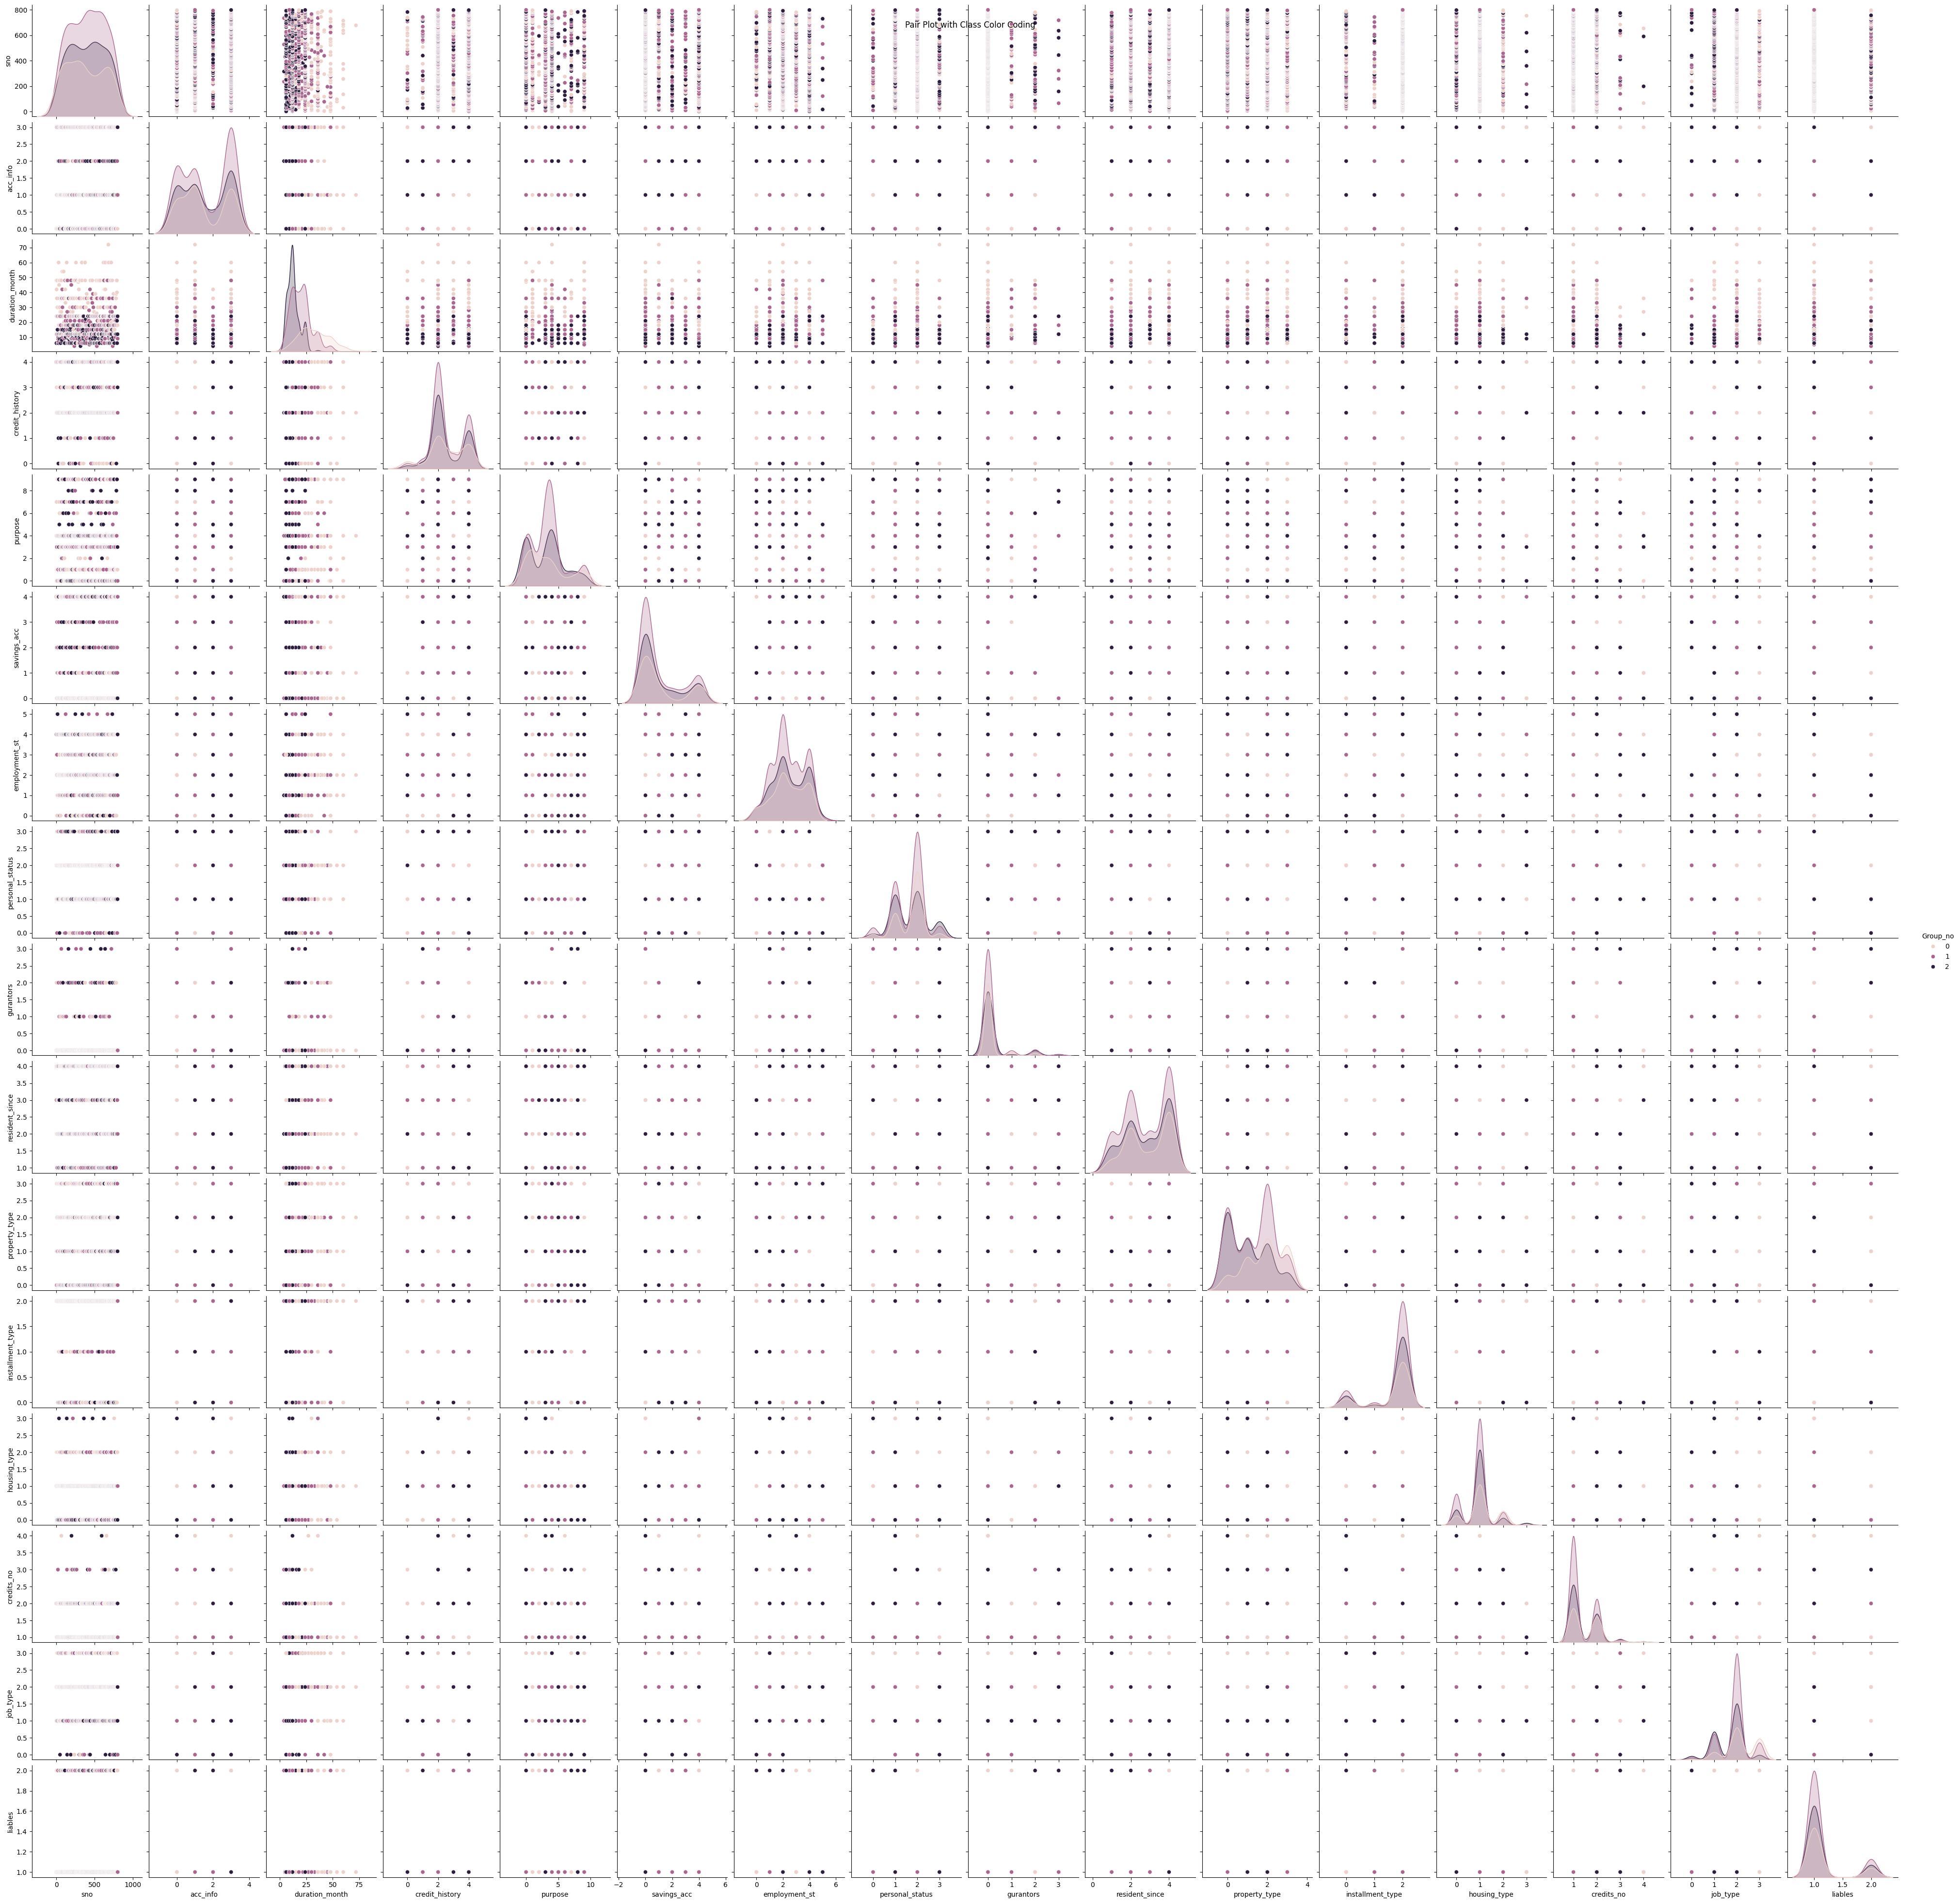

Histograms for each feature with Group_no as hue


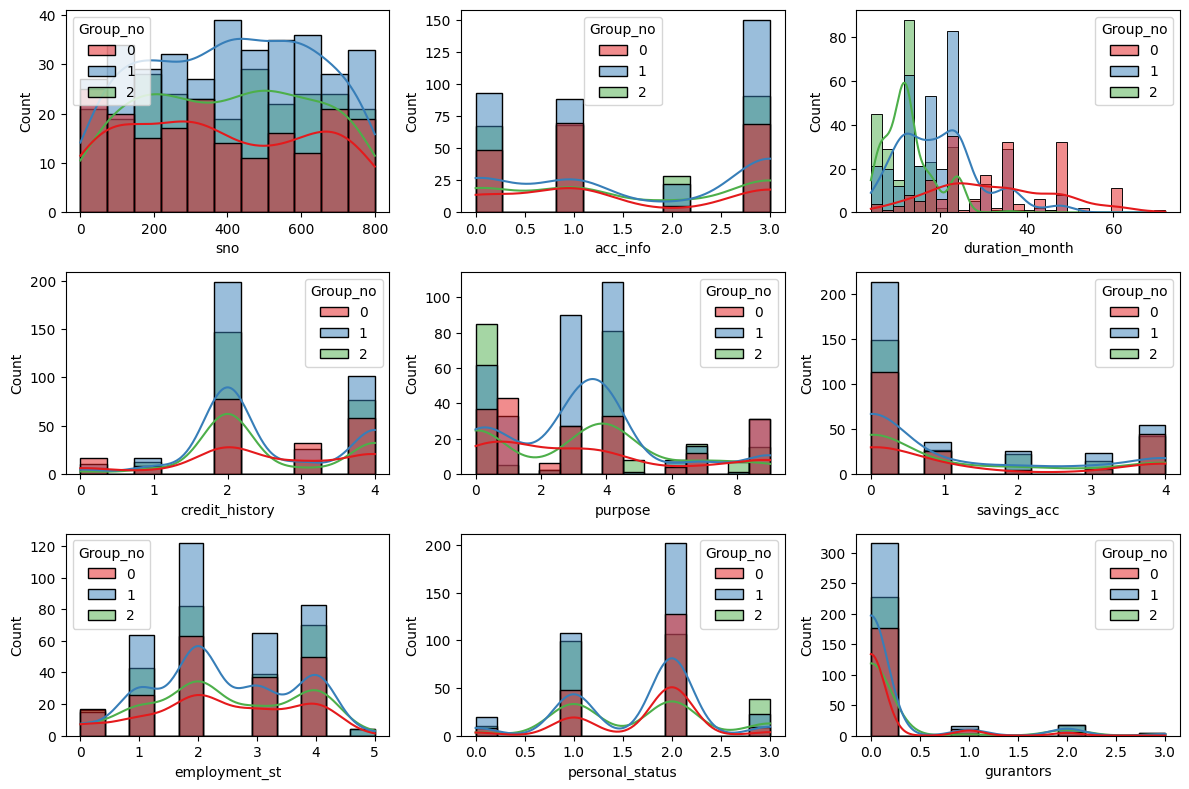

Box plots for each feature with Group_no as x-axis


<ipython-input-5-d543e55e25b0>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Group_no', y=col, palette='Set2')
<ipython-input-5-d543e55e25b0>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Group_no', y=col, palette='Set2')
<ipython-input-5-d543e55e25b0>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Group_no', y=col, palette='Set2')
<ipython-input-5-d543e55e25b0>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to

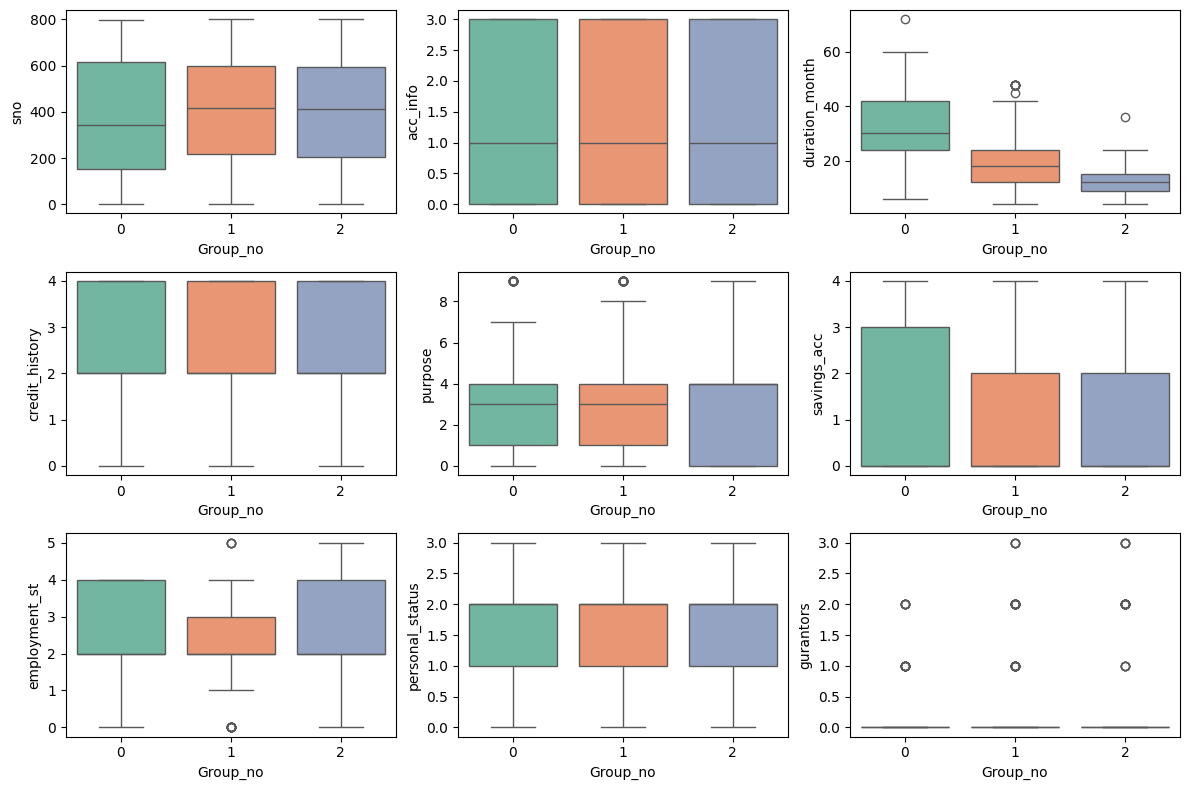

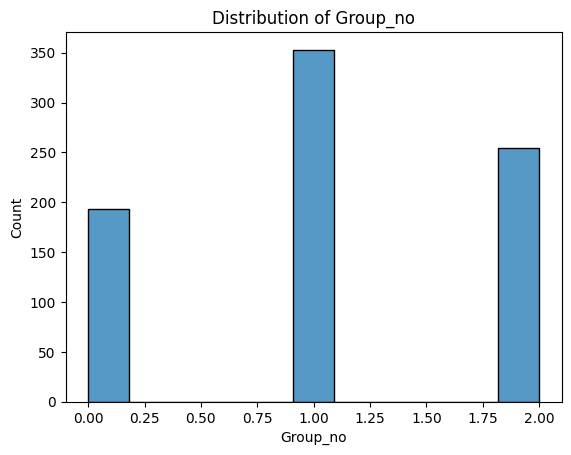

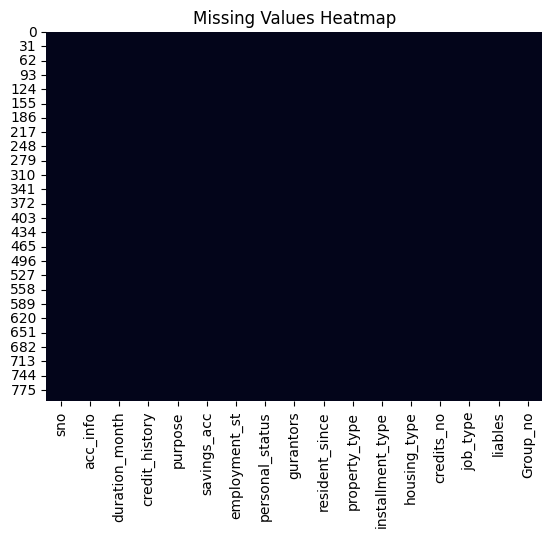

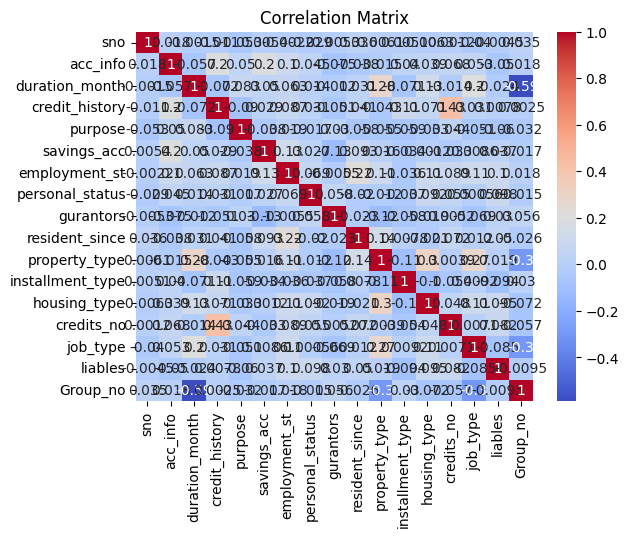

In [ ]:
# example Box Plot of Duration Month by Group_no
print('Box Plot of Duration Month by Group_no')
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group_no', y='duration_month', data=df)
plt.title('Box Plot of Duration Month by Group_no')
plt.show()
#Example pair plot with color-coded classes
print('pair plot with color-coded classes')
sns.pairplot(df, hue='Group_no', diag_kind='kde')
plt.suptitle('Pair Plot with Class Color Coding')
plt.show()
# Histograms for each feature with 'Group_no' as hue
print('Histograms for each feature with Group_no as hue')
plt.figure(figsize=(12, 8))
num_cols = min(len(df.columns[:-1]), 9)
for i, col in enumerate(df.columns[:-1][:num_cols]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df, x=col, hue='Group_no', kde=True, palette='Set1')
plt.tight_layout()
plt.show()

# Box plots for each feature with 'Group_no' as x-axis
print('Box plots for each feature with Group_no as x-axis')
plt.figure(figsize=(12, 8))
num_cols = min(len(df.columns[:-1]), 9)
for i, col in enumerate(df.columns[:-1][:num_cols]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x='Group_no', y=col, palette='Set2')
plt.tight_layout()
plt.show()


# Plot distribution of 'target_variable'
sns.histplot(df['Group_no'])
plt.title('Distribution of Group_no')
plt.show()

# Plot missing values
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


# Plot correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **UNIVARIATE ANALYSIS**

Summary statistics for numeric features:
            sno  duration_month  credits_no     liables  resident_since
count  800.0000       800.00000  800.000000  800.000000      800.000000
mean   400.5000        20.65125    1.396250    1.147500        2.841250
std    231.0844        12.15635    0.569773    0.354825        1.106833
min      1.0000         4.00000    1.000000    1.000000        1.000000
25%    200.7500        12.00000    1.000000    1.000000        2.000000
50%    400.5000        18.00000    1.000000    1.000000        3.000000
75%    600.2500        24.00000    2.000000    1.000000        4.000000
max    800.0000        72.00000    4.000000    2.000000        4.000000


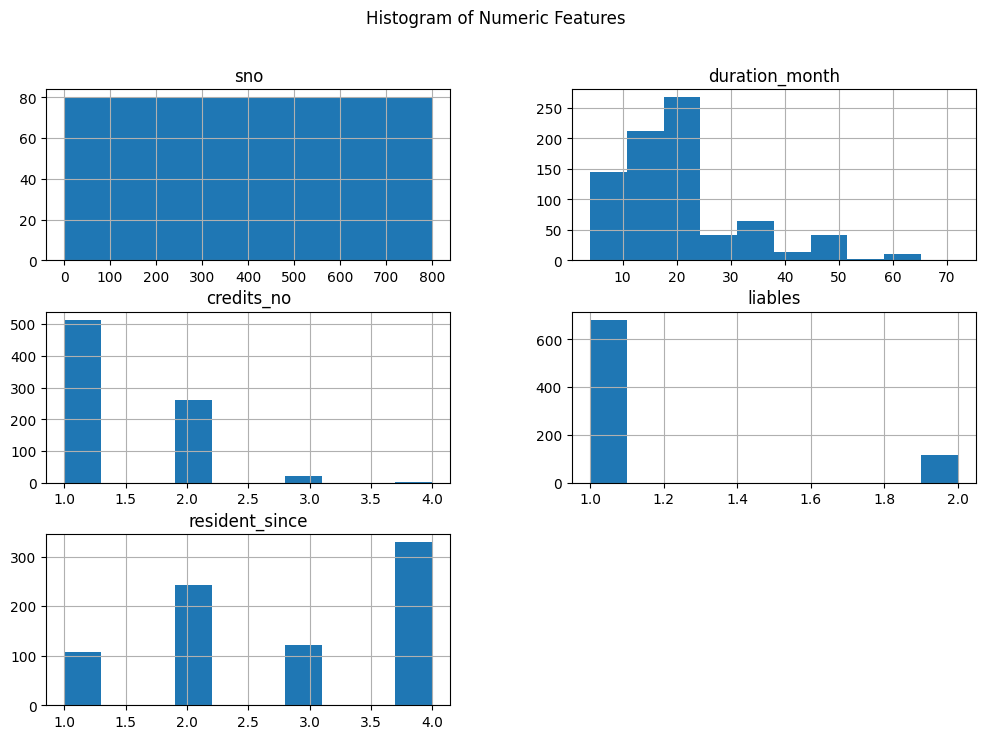

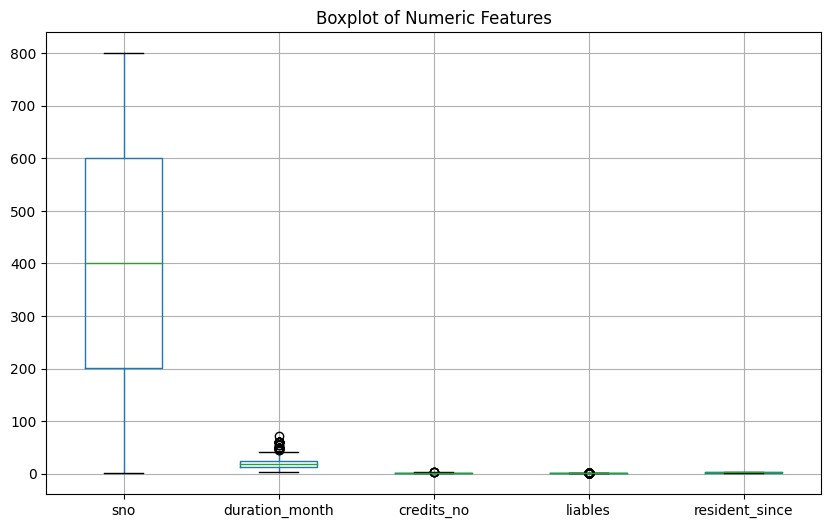


Frequency distribution for acc_info
acc_info
3    310
1    226
0    209
2     55
Name: count, dtype: int64


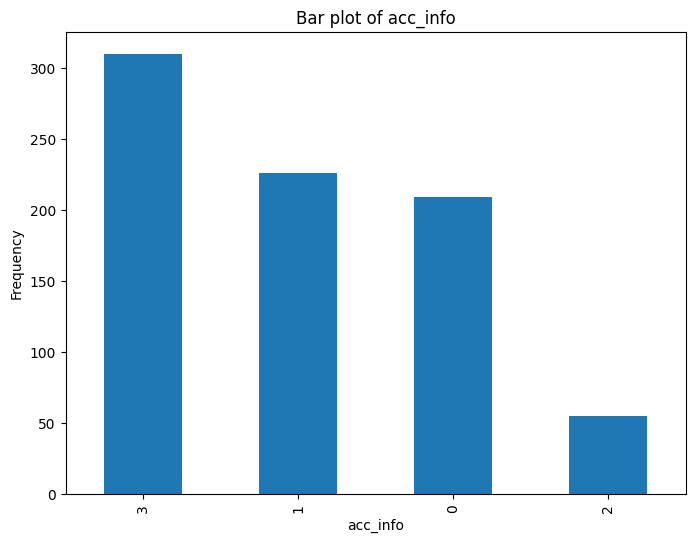

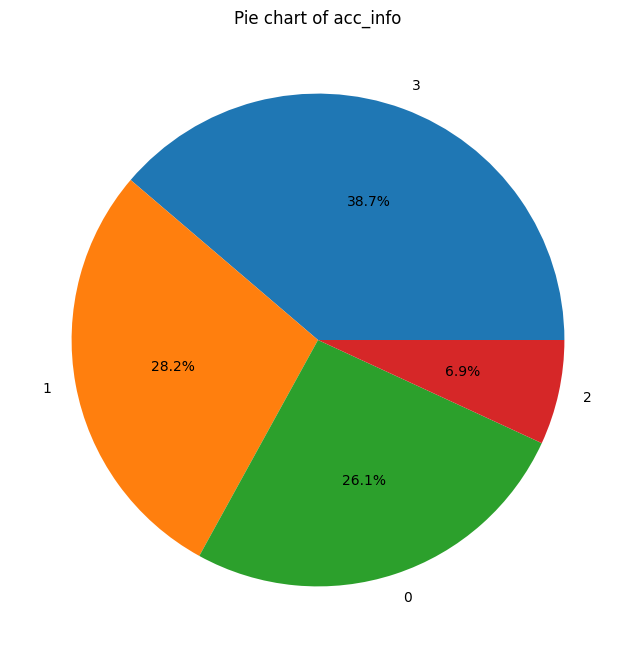


Frequency distribution for credit_history
credit_history
2    424
4    235
3     71
1     37
0     33
Name: count, dtype: int64


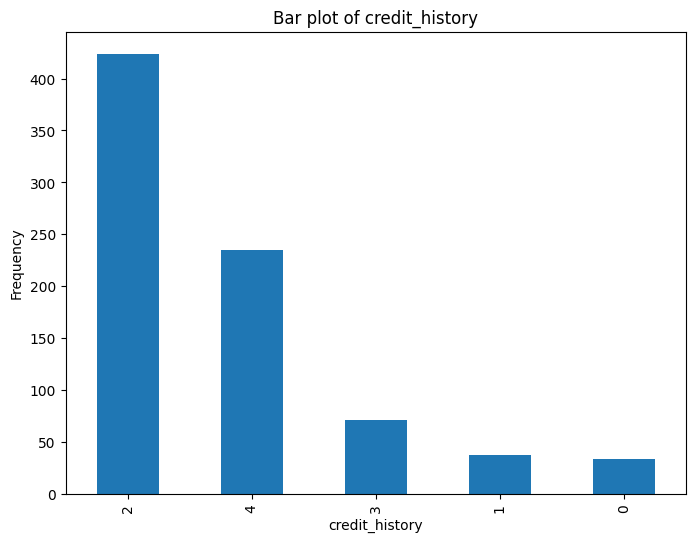

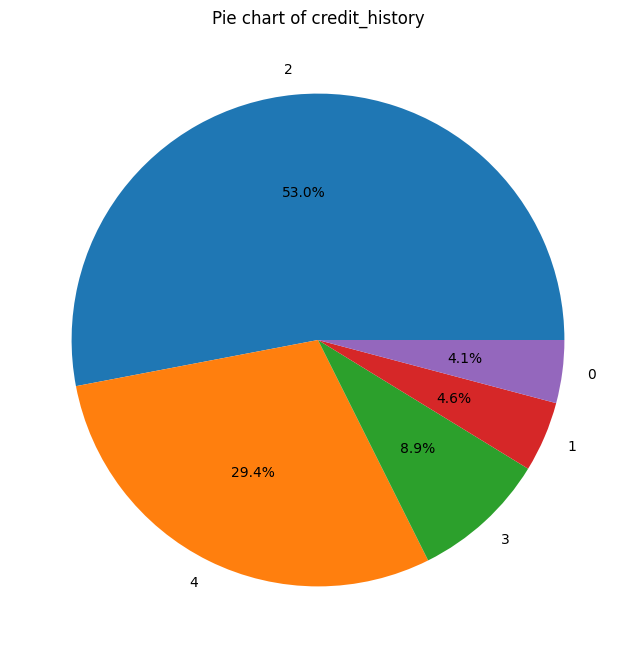


Frequency distribution for purpose
purpose
4    223
0    184
3    144
1     81
9     77
7     45
6     19
2     10
5      9
8      8
Name: count, dtype: int64


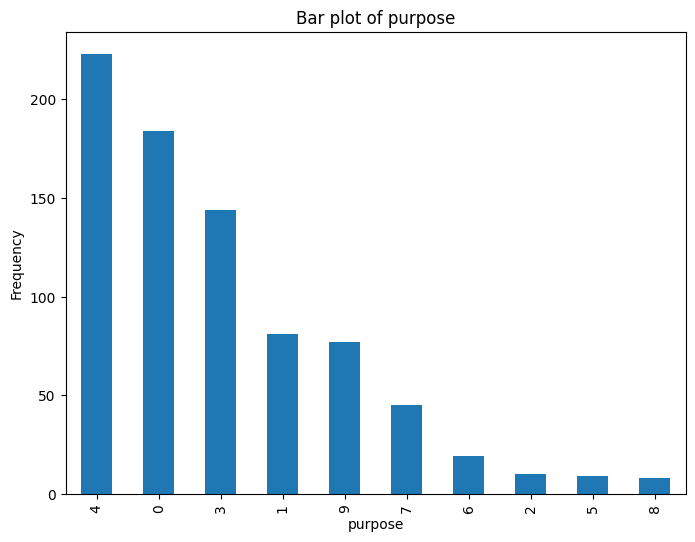

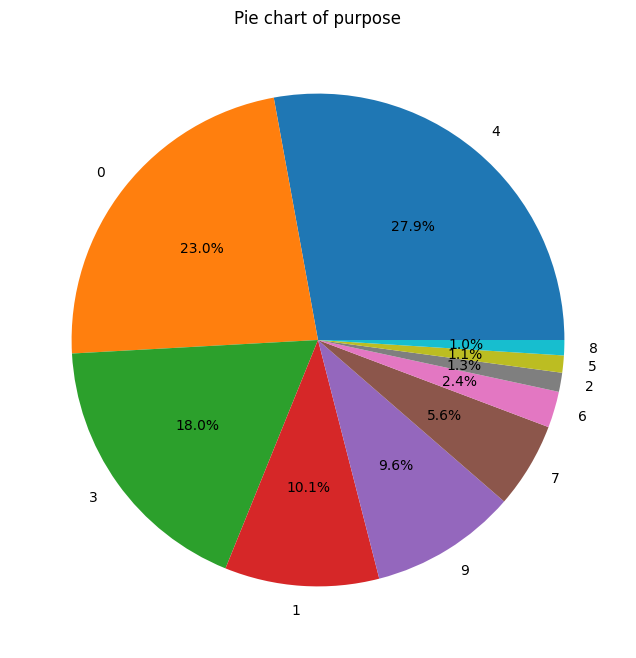


Frequency distribution for savings_acc
savings_acc
0    476
4    142
1     89
2     51
3     42
Name: count, dtype: int64


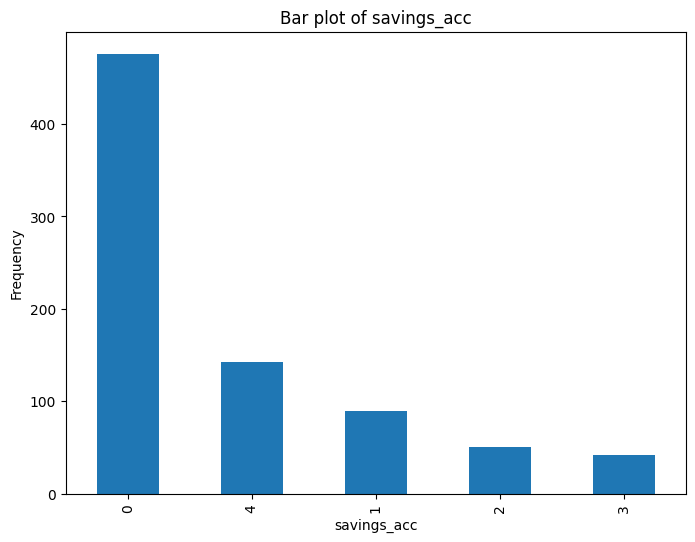

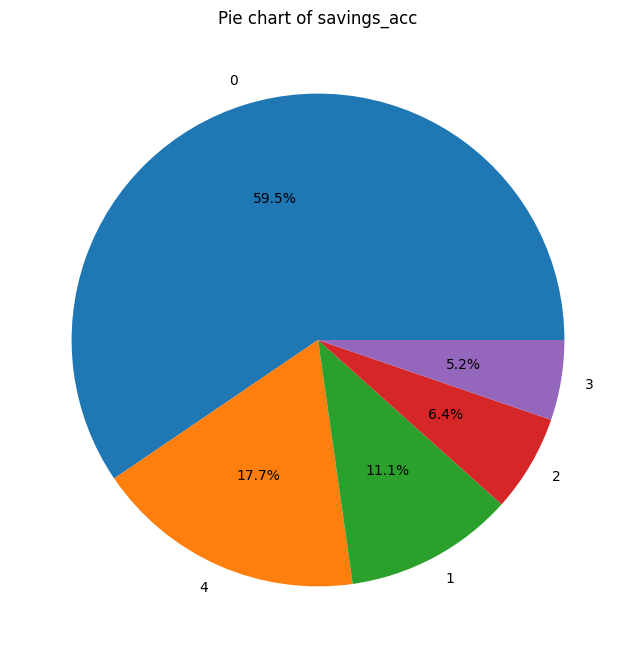


Frequency distribution for employment_st
employment_st
2    267
4    203
3    141
1    133
0     48
5      8
Name: count, dtype: int64


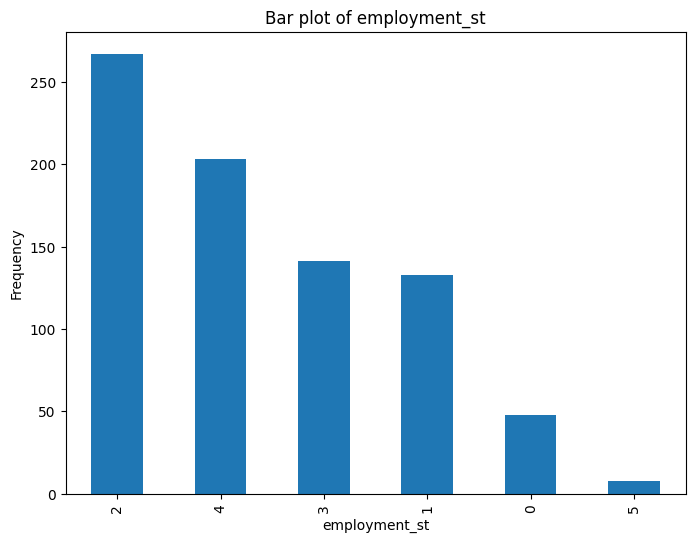

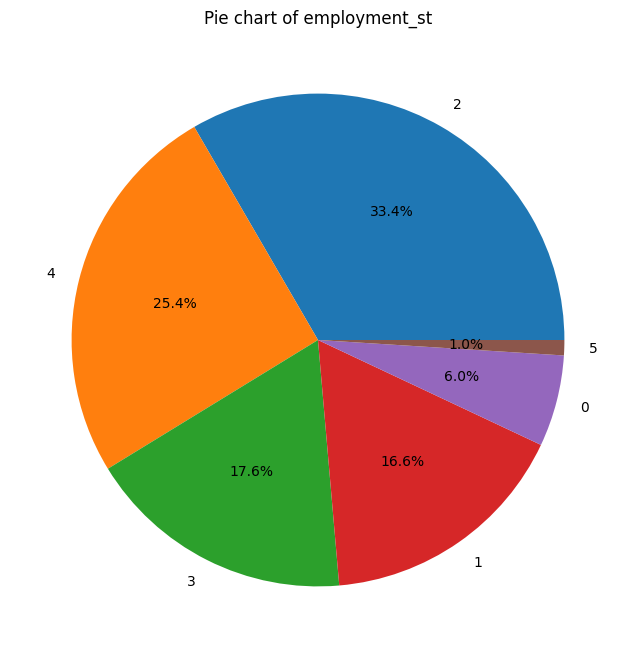


Frequency distribution for personal_status
personal_status
2    437
1    255
3     70
0     38
Name: count, dtype: int64


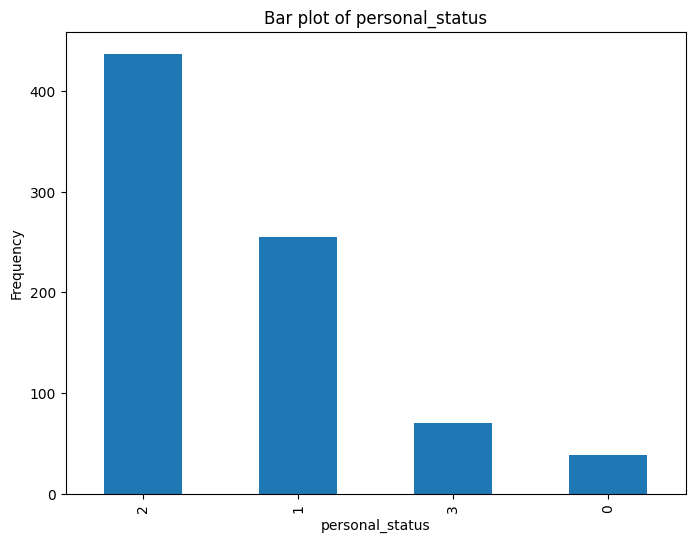

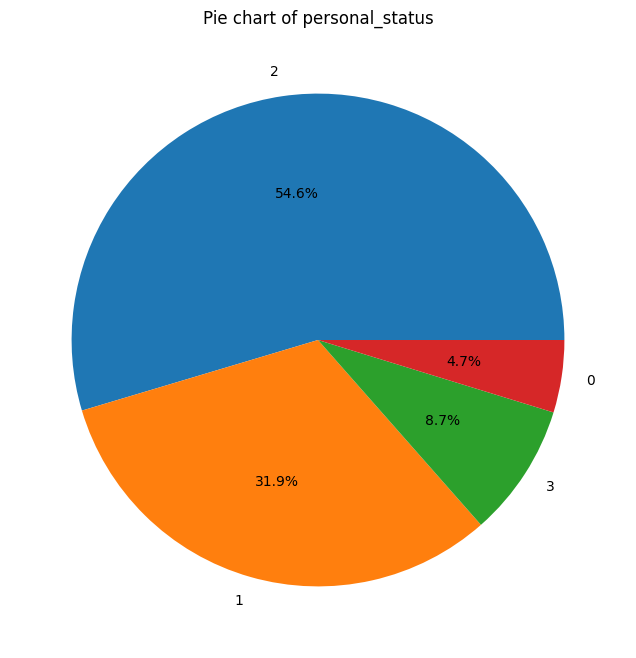


Frequency distribution for gurantors
gurantors
0    720
2     42
1     30
3      8
Name: count, dtype: int64


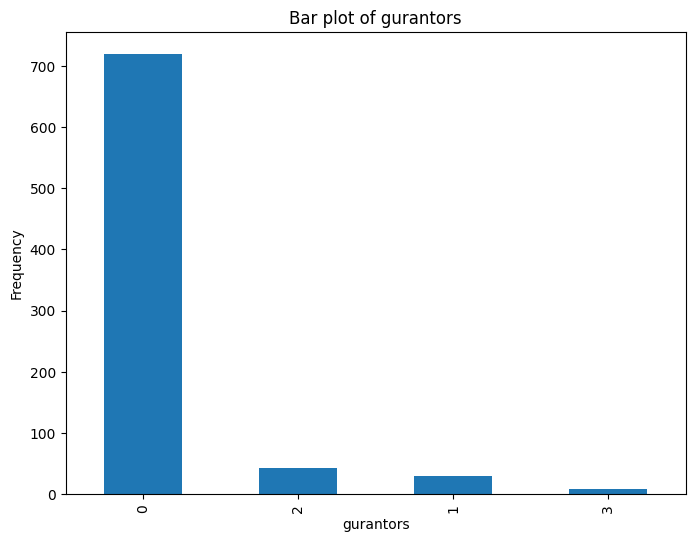

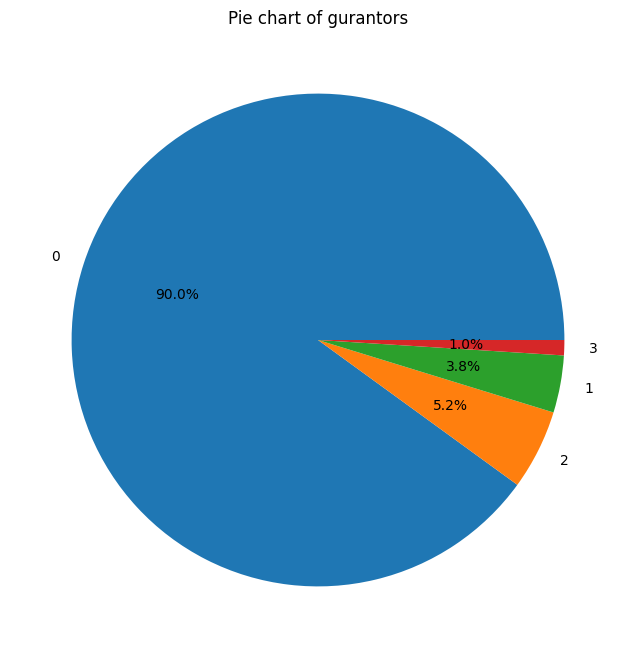


Frequency distribution for property_type
property_type
2    266
0    229
1    177
3    128
Name: count, dtype: int64


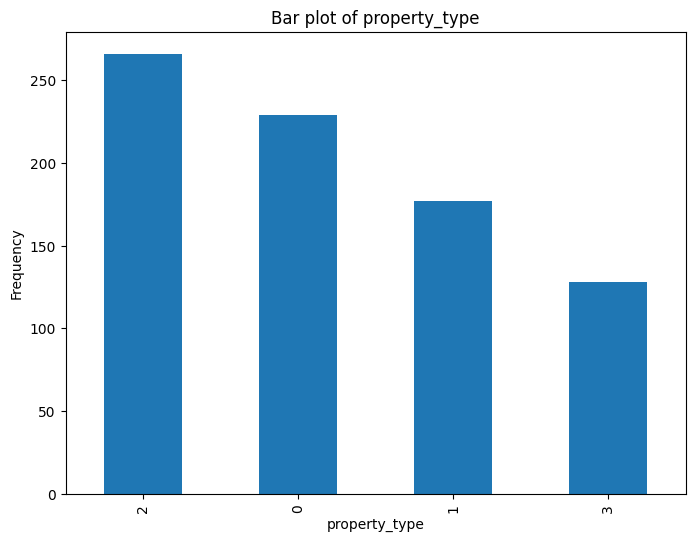

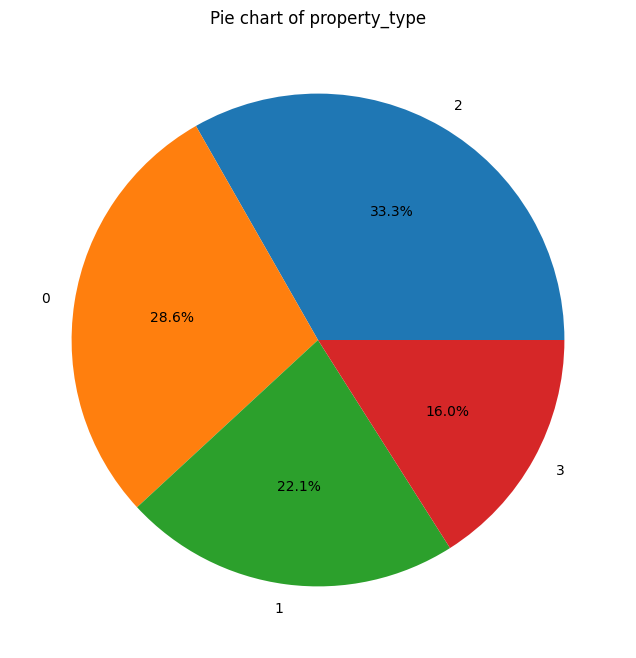


Frequency distribution for installment_type
installment_type
2    653
0    112
1     35
Name: count, dtype: int64


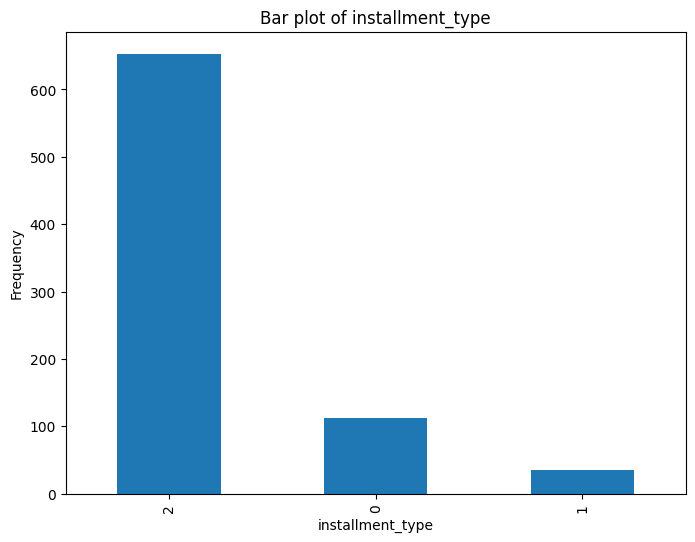

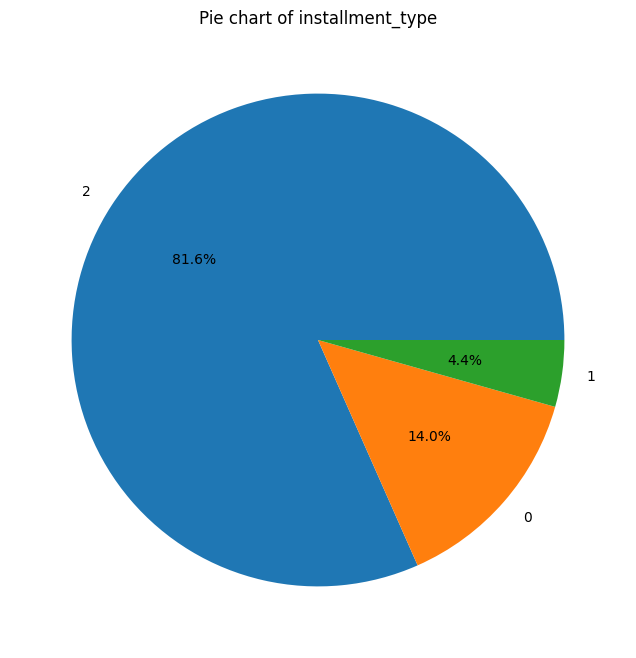


Frequency distribution for housing_type
housing_type
1    563
0    140
2     90
3      7
Name: count, dtype: int64


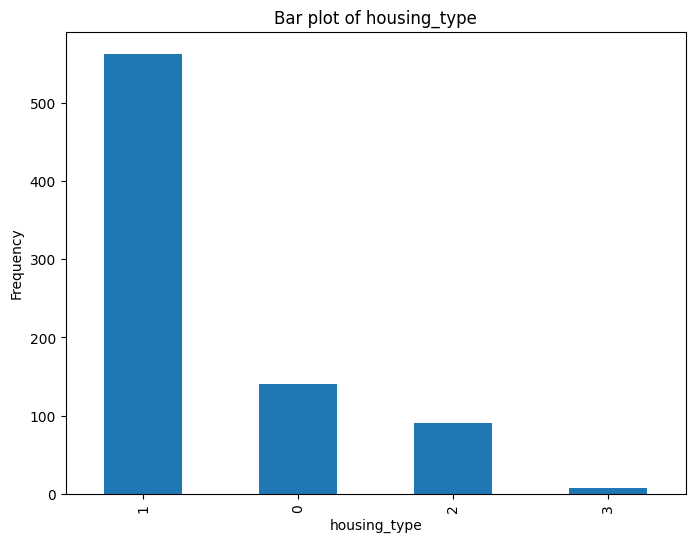

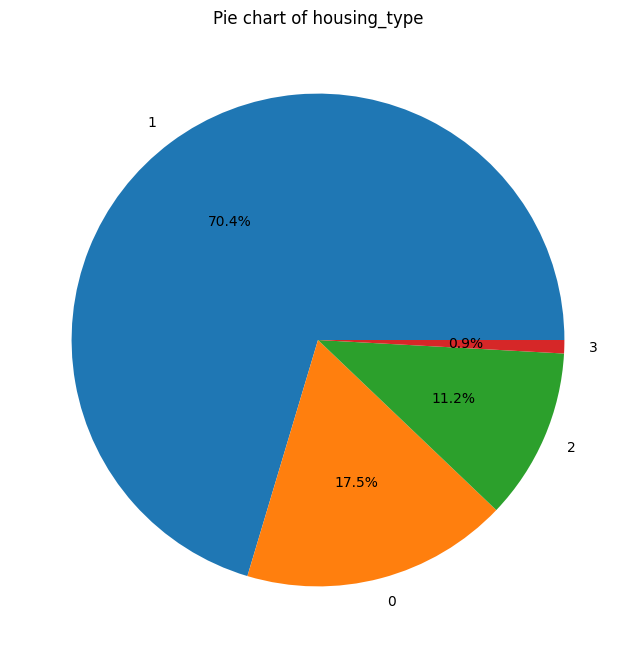


Frequency distribution for job_type
job_type
2    503
1    161
3    119
0     17
Name: count, dtype: int64


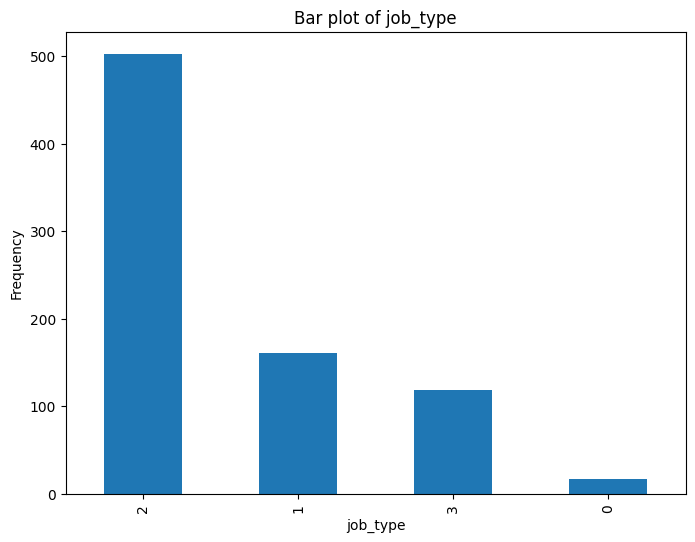

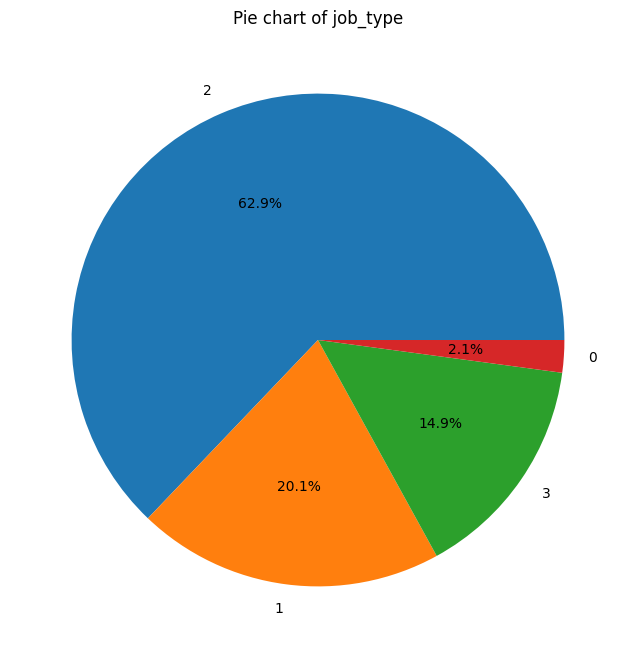

In [ ]:
# Numeric Features
numeric_features = ['sno', 'duration_month', 'credits_no', 'liables', 'resident_since']

# Categorical Features
categorical_features = ['acc_info', 'credit_history', 'purpose', 'savings_acc',
                        'employment_st', 'personal_status', 'gurantors', 'property_type',
                        'installment_type', 'housing_type', 'job_type']

# Summary statistics for numeric features
print("Summary statistics for numeric features:")
print(df[numeric_features].describe())

# Histogram for numeric features
df[numeric_features].hist(figsize=(12, 8))
plt.suptitle("Histogram of Numeric Features")
plt.show()

# Box plot for numeric features
df[numeric_features].boxplot(figsize=(10, 6))
plt.title("Boxplot of Numeric Features")
plt.show()

# Frequency distribution for categorical features
for feature in categorical_features:
    print("\nFrequency distribution for", feature)
    print(df[feature].value_counts())

    # Bar plot for categorical features
    df[feature].value_counts().plot(kind='bar', figsize=(8, 6))
    plt.title("Bar plot of " + feature)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

    # Pie chart for categorical features
    df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
    plt.title("Pie chart of " + feature)
    plt.ylabel("")
    plt.show()

# **BIVARIATE ANALYSIS**

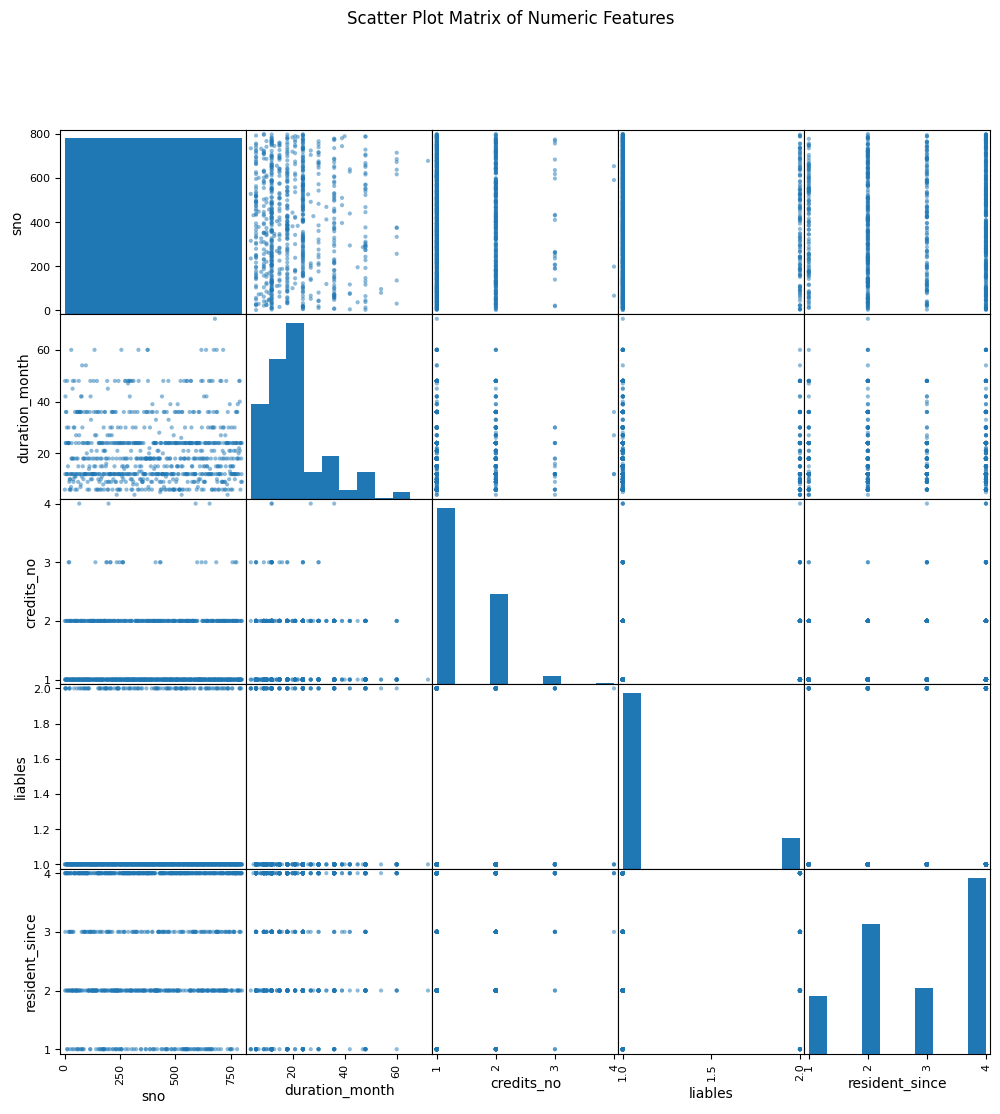

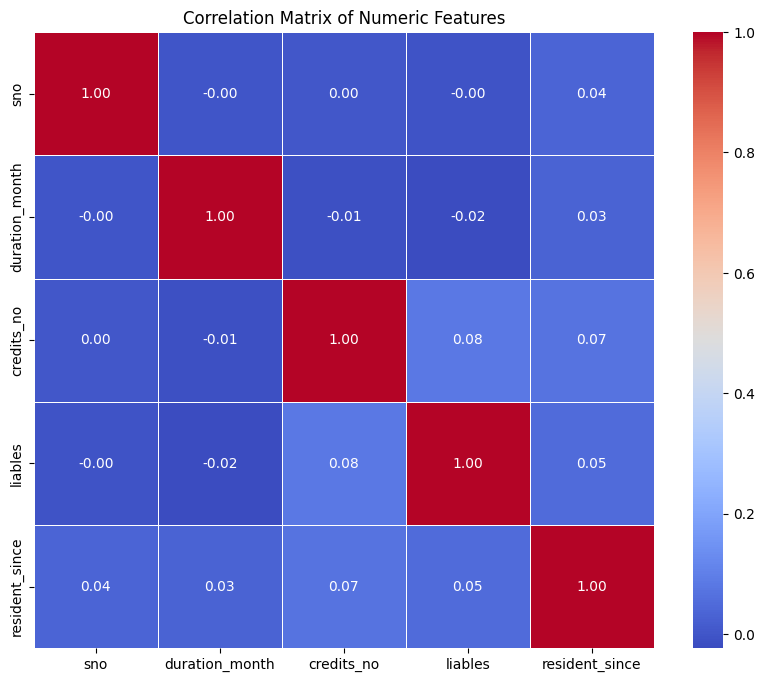


Contingency table for acc_info vs credit_history
credit_history   0   1    2   3    4
acc_info                            
0               11  15  121  10   52
1               15  13  125  30   43
2                1   3   32   3   16
3                6   6  146  28  124
Chi-square test p-value: 7.287759040391872e-07

Contingency table for acc_info vs purpose
purpose    0   1  2   3    4  5  6   7  8   9
acc_info                                     
0         57  19  3  57   41  4  5  12  2   9
1         50  17  6  34   62  2  7  11  3  34
2         14   2  0  11   19  1  0   4  0   4
3         63  43  1  42  101  2  7  18  3  30
Chi-square test p-value: 0.0003228159405739278

Contingency table for acc_info vs savings_acc
savings_acc    0   1   2   3   4
acc_info                        
0            161  10   7   5  26
1            129  42   8  13  34
2             36   4   3   3   9
3            150  33  33  21  73
Chi-square test p-value: 1.0910678269886966e-09

Contingency table for

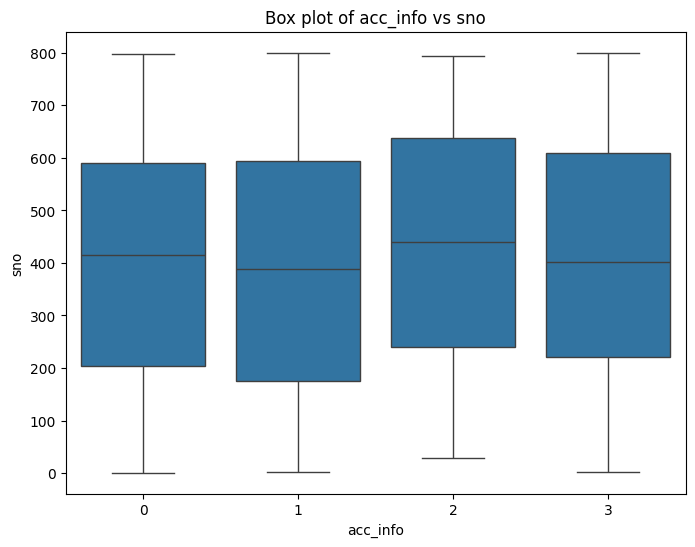

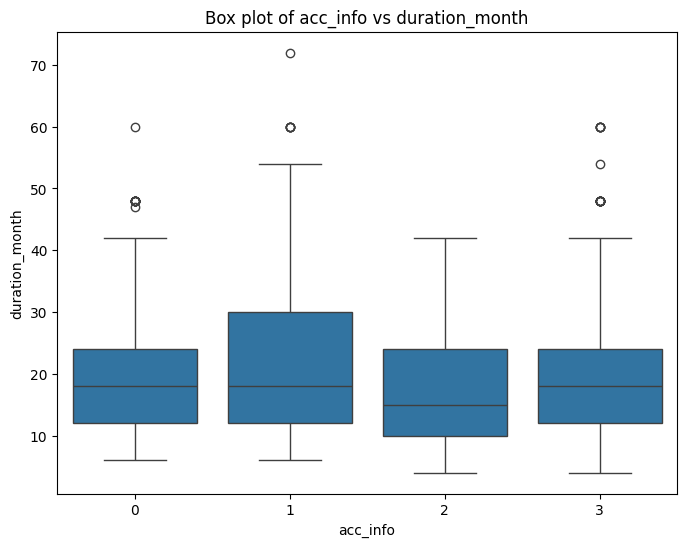

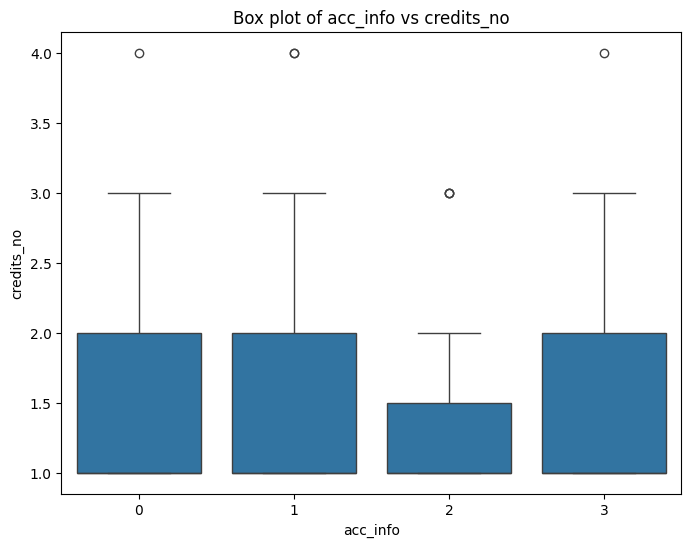

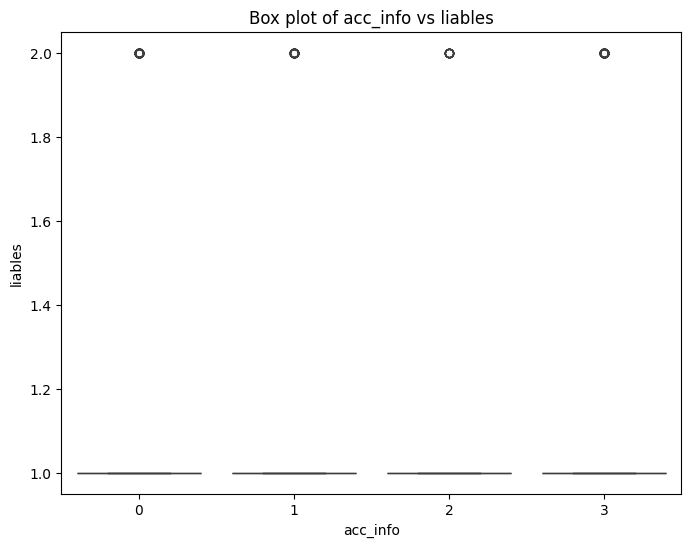

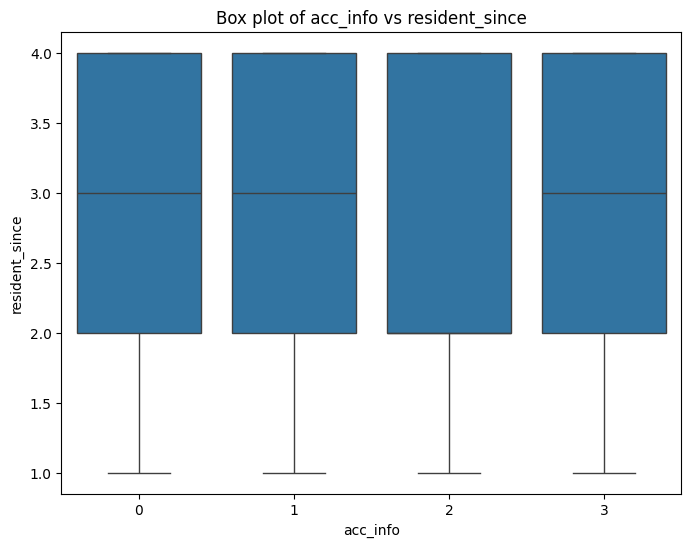

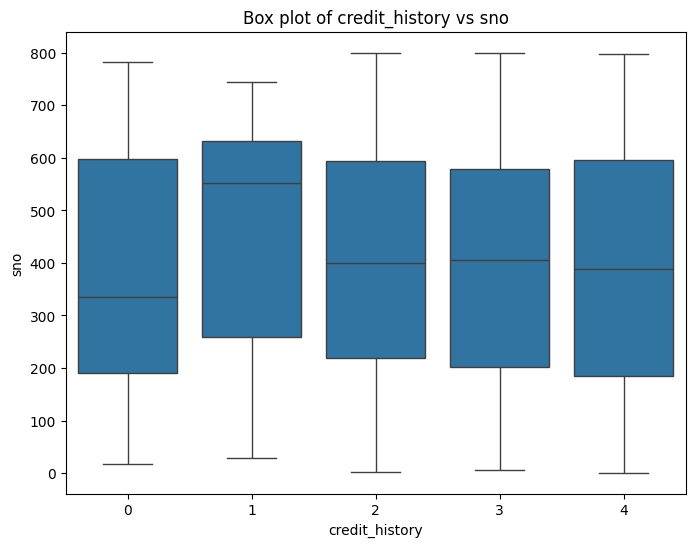

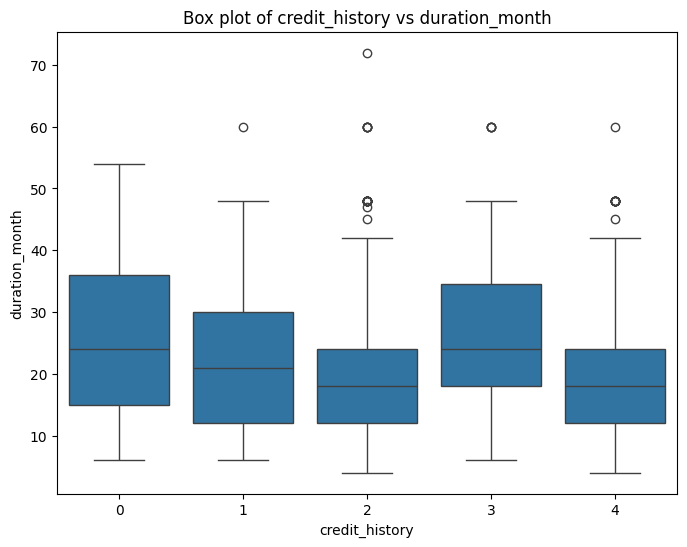

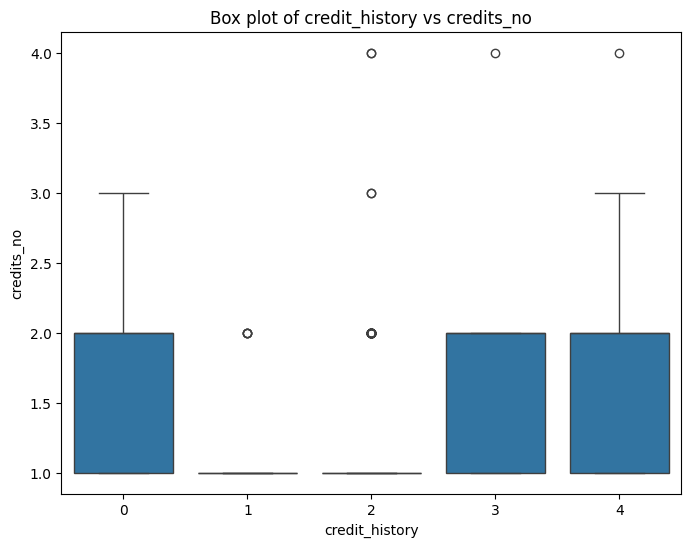

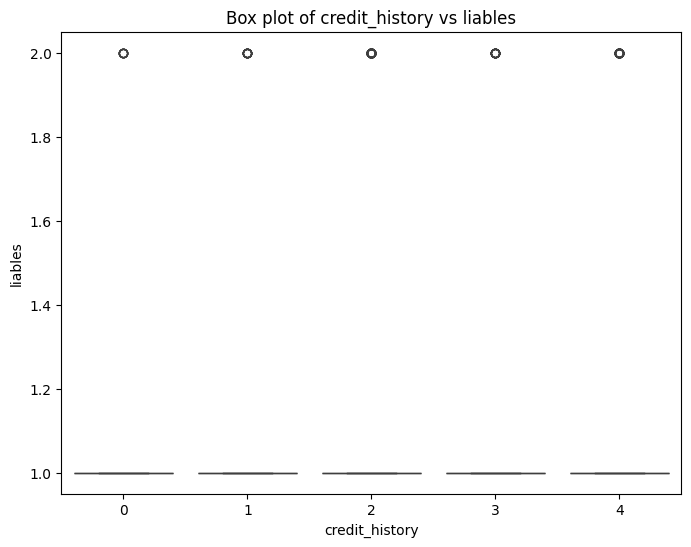

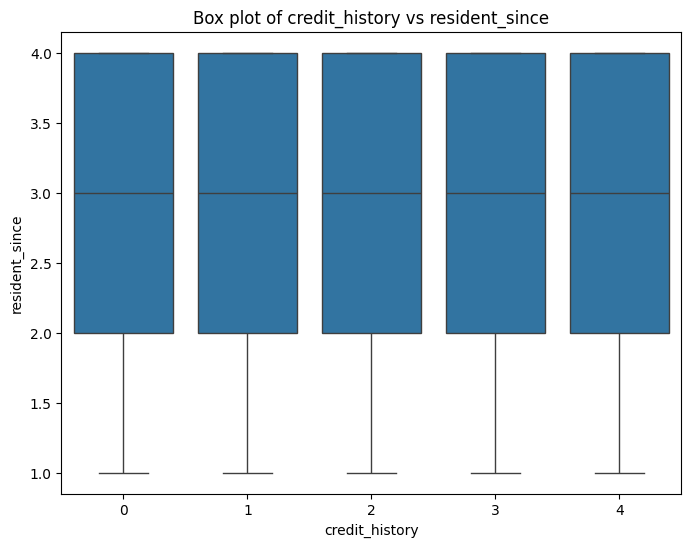

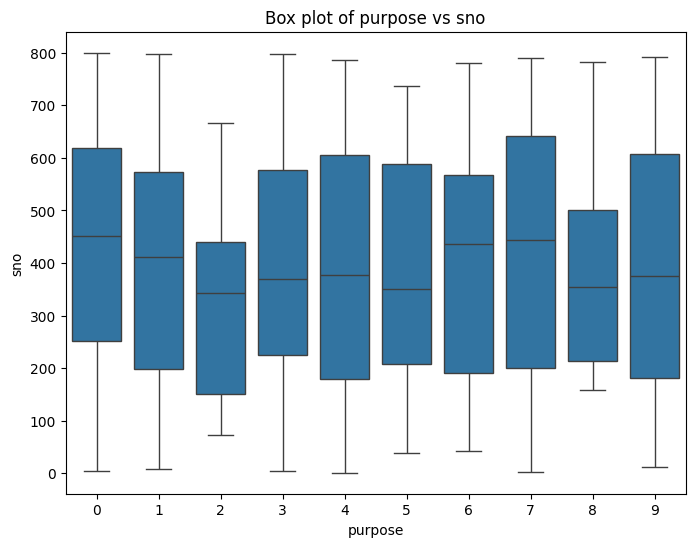

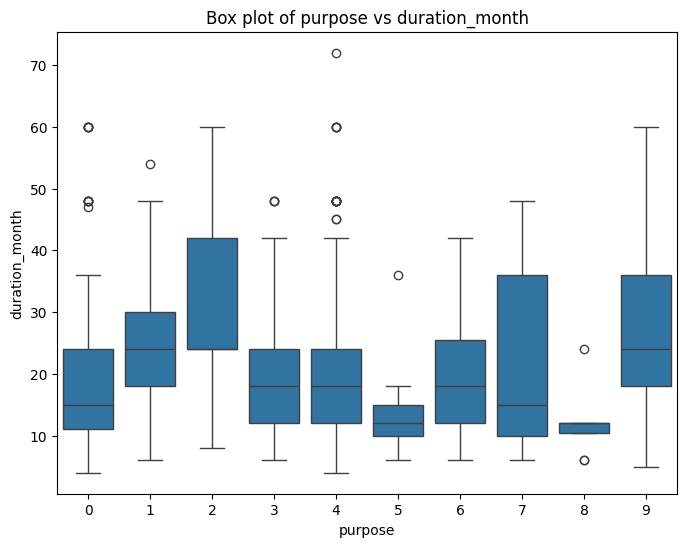

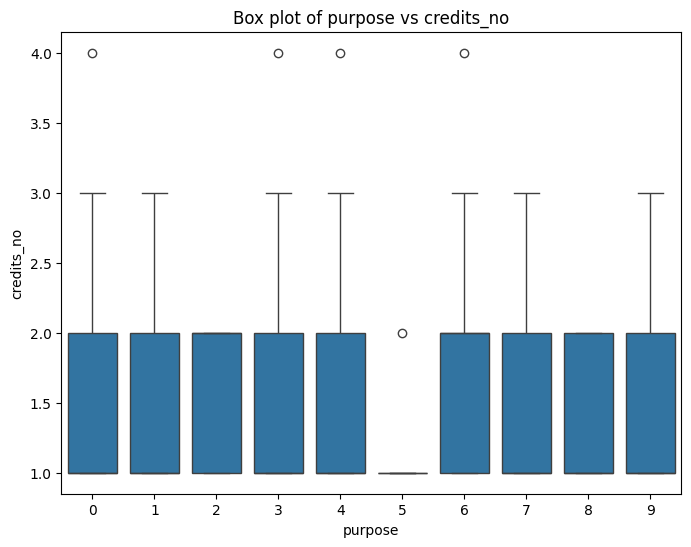

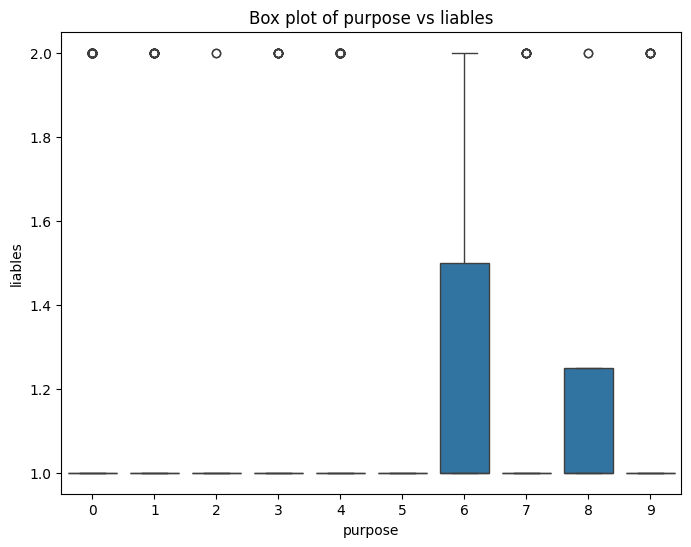

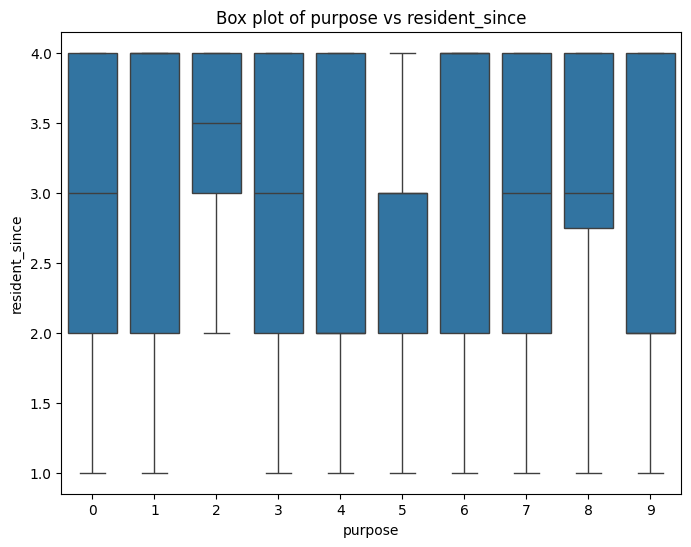

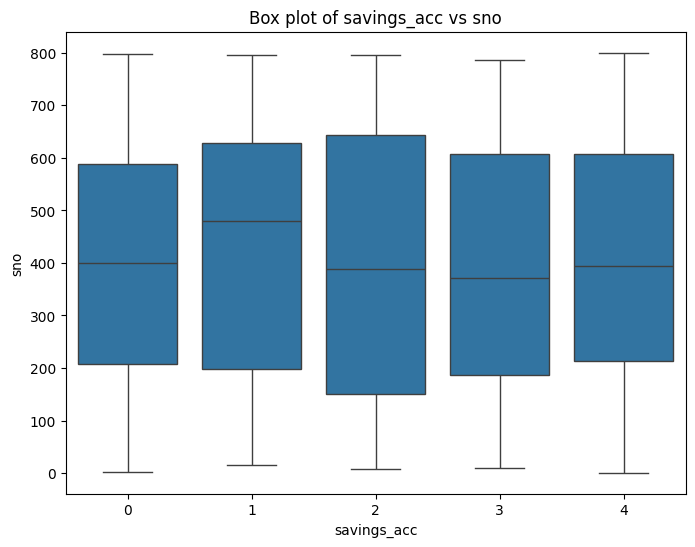

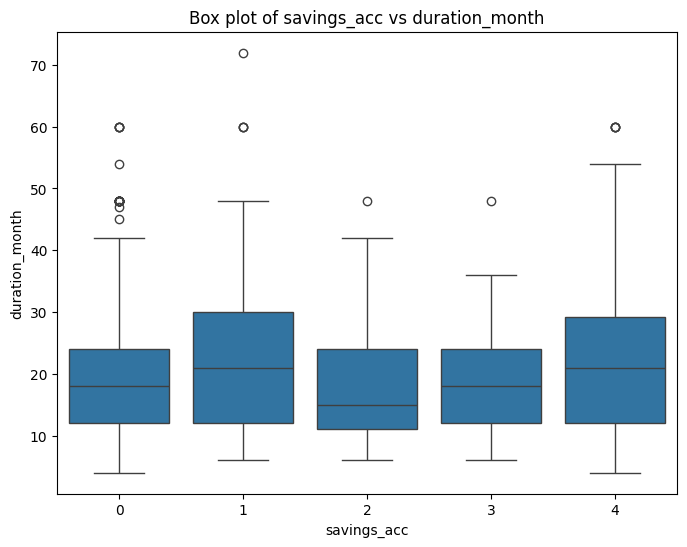

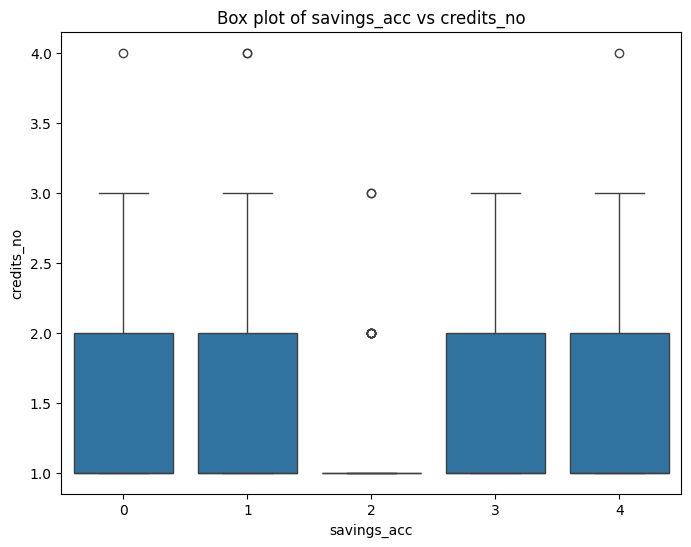

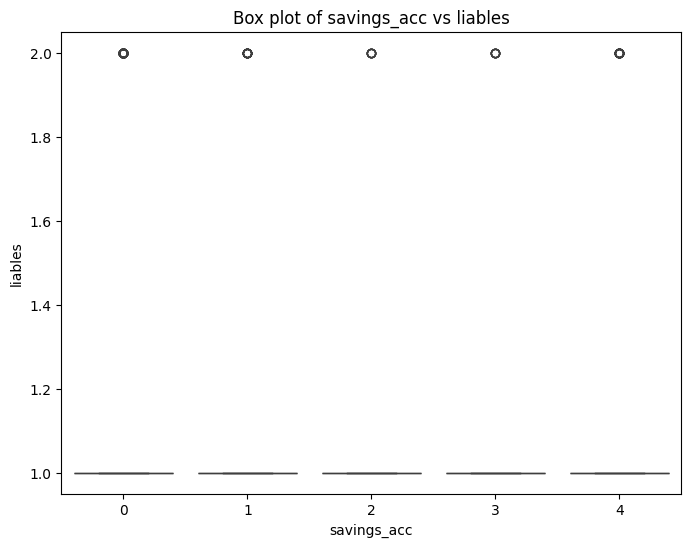

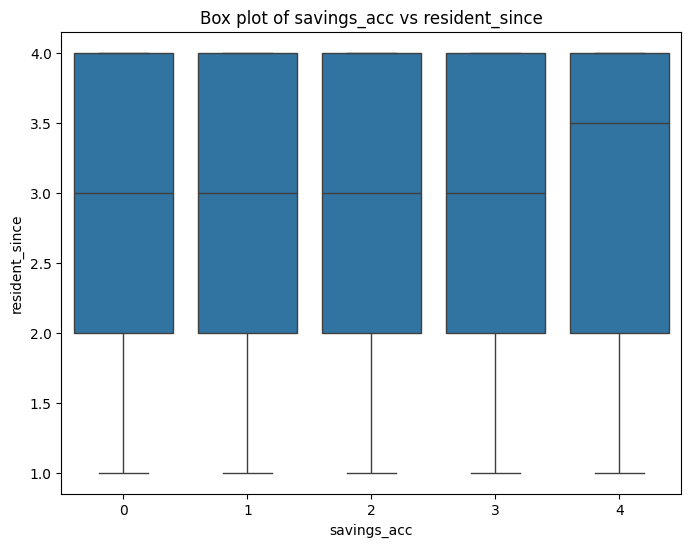

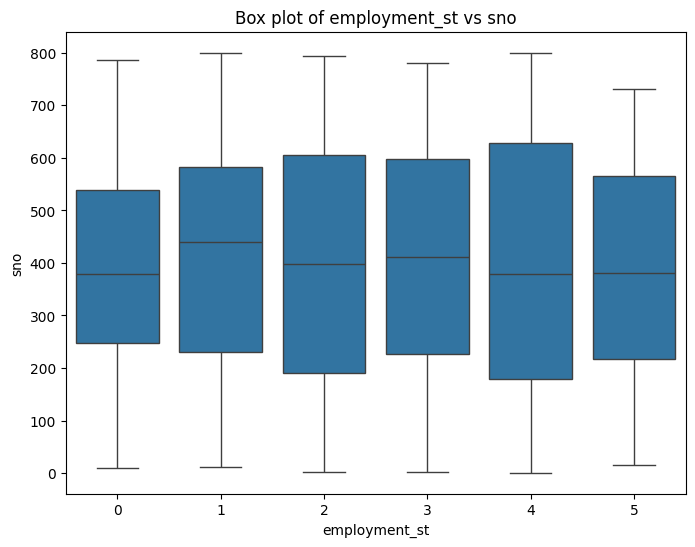

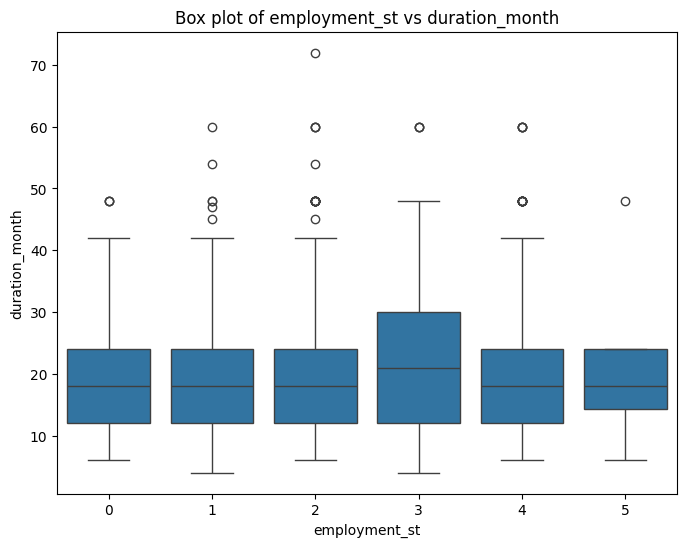

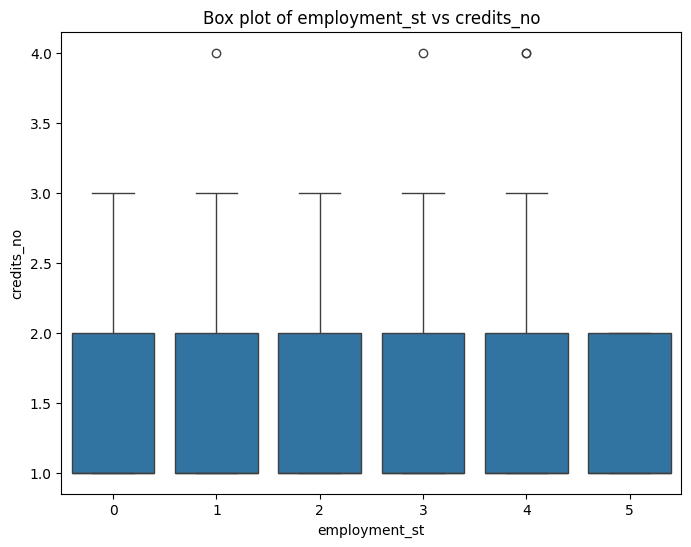

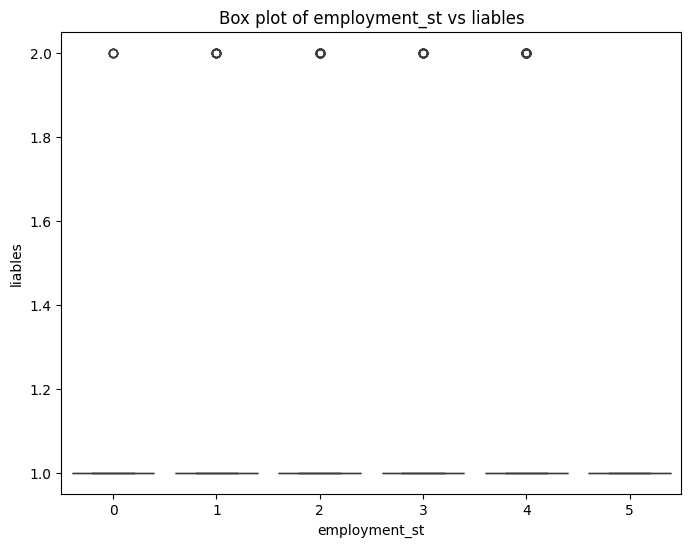

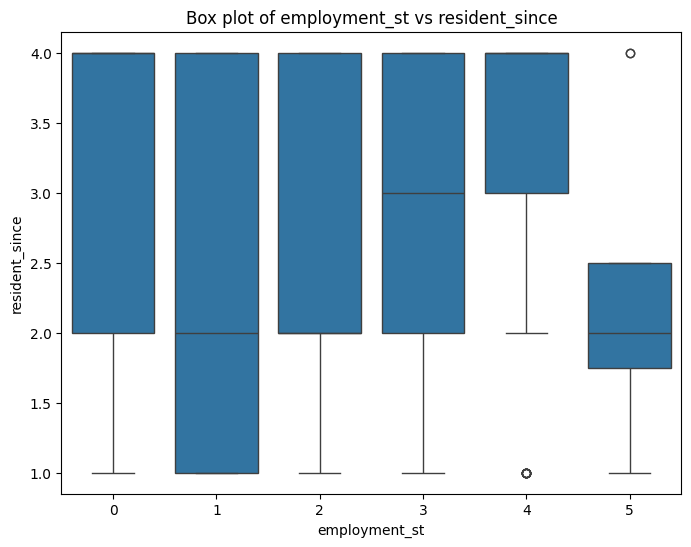

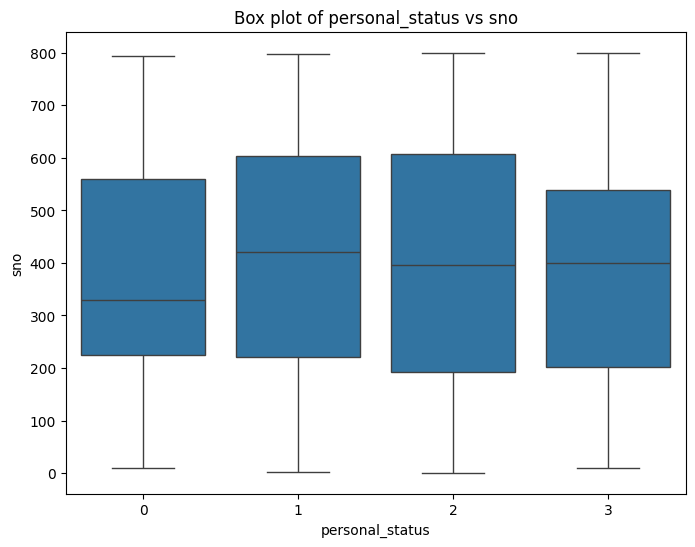

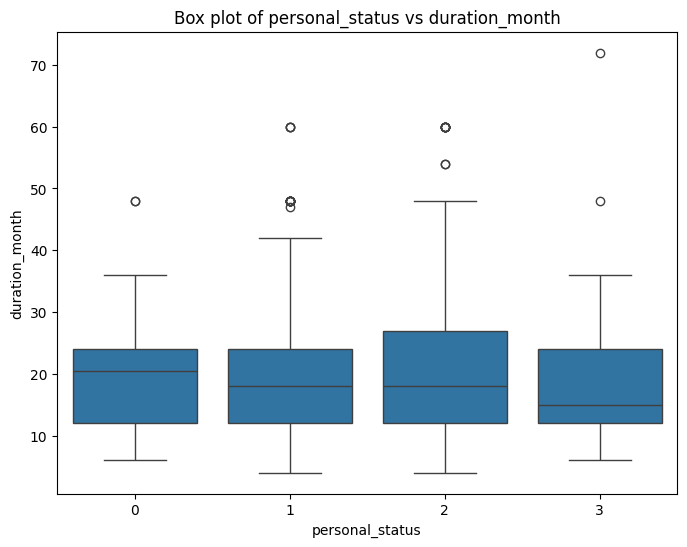

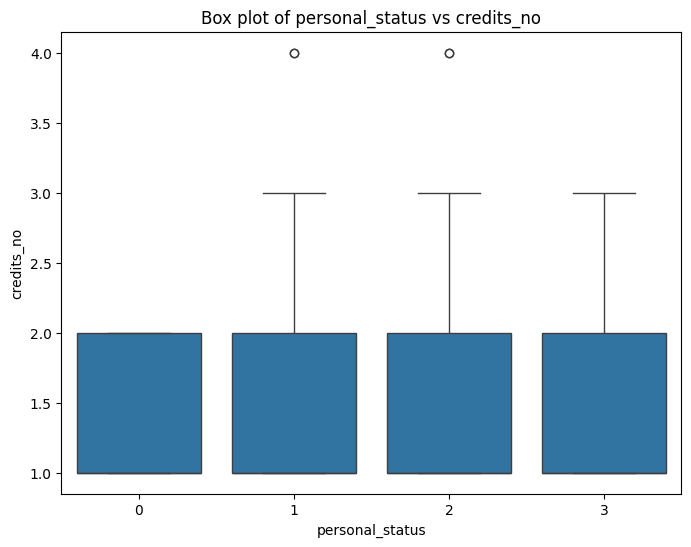

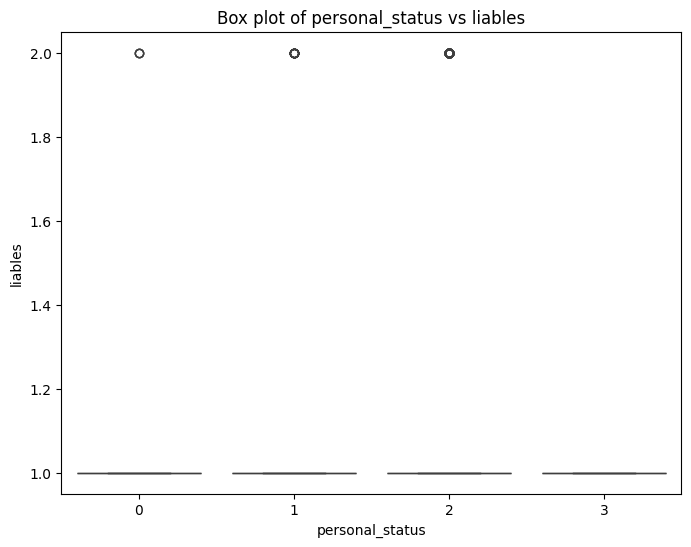

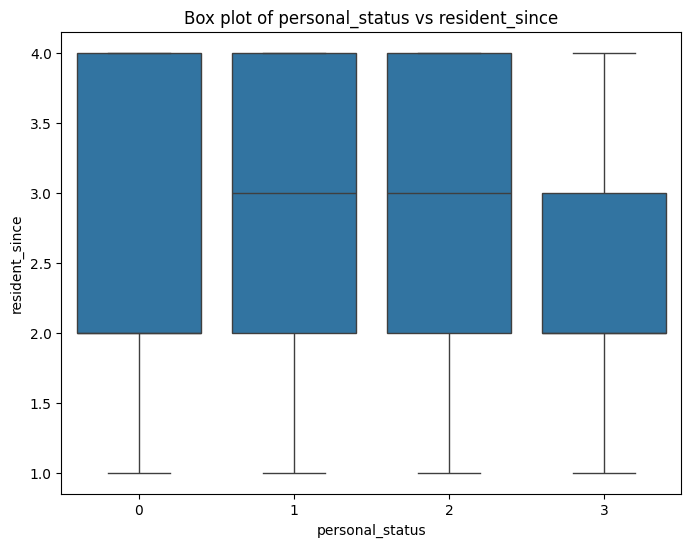

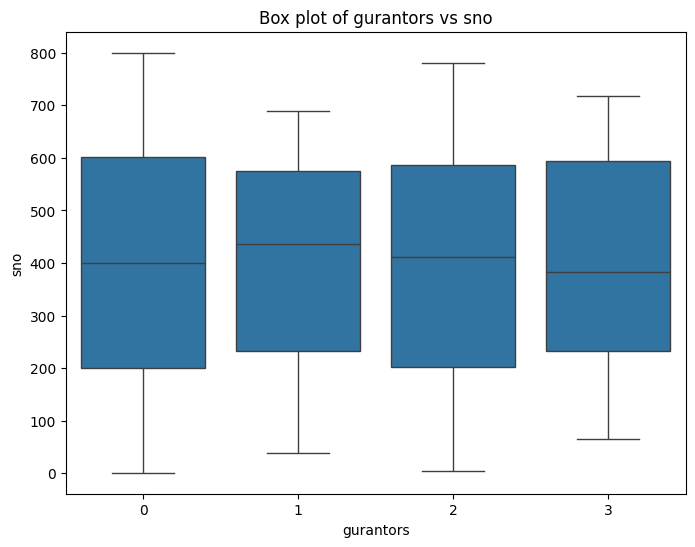

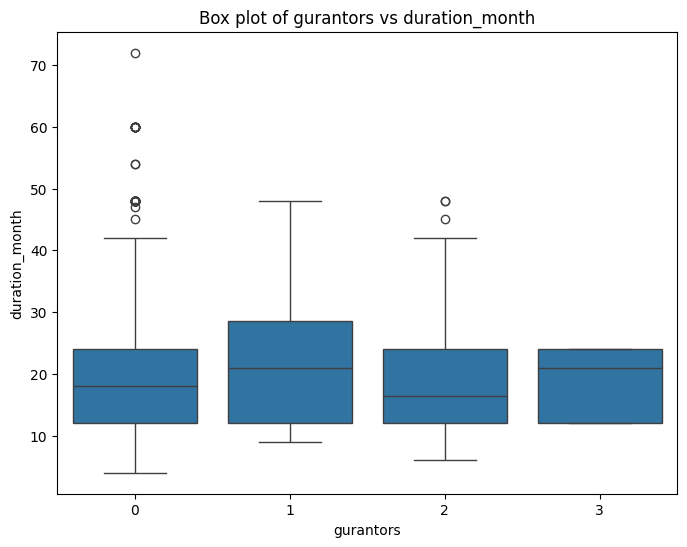

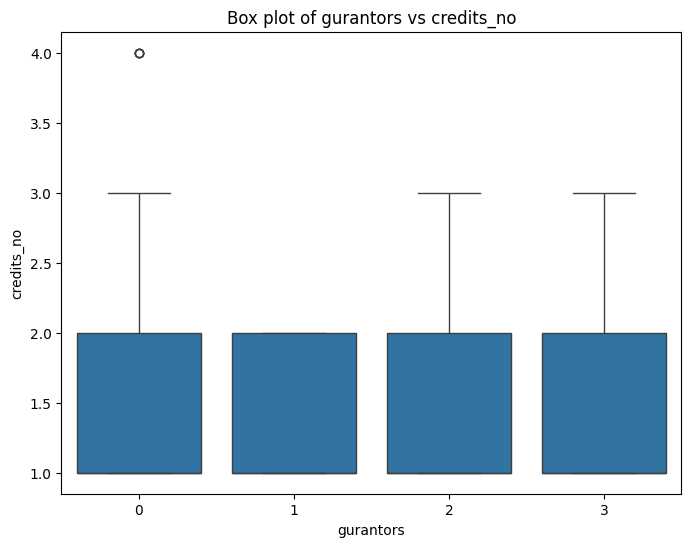

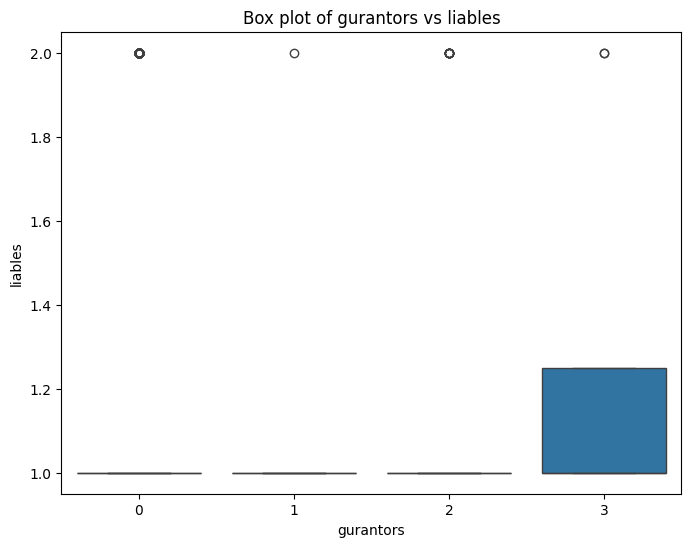

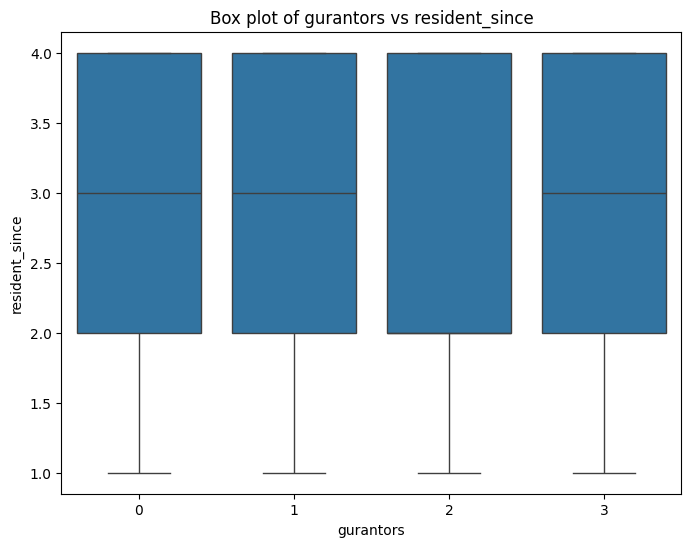

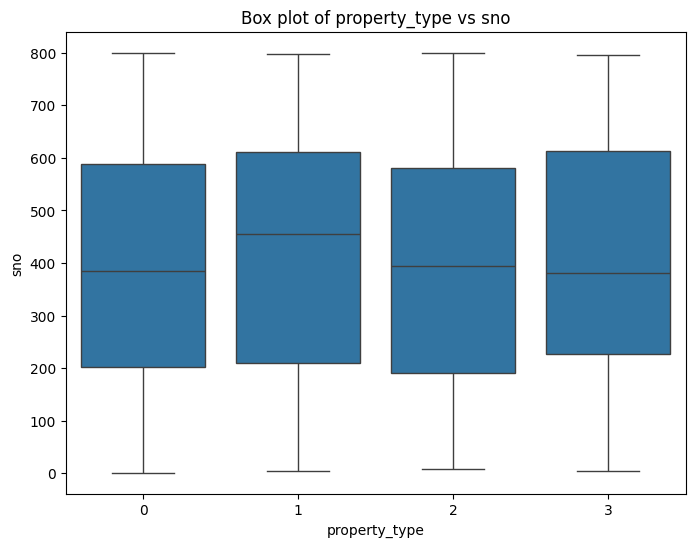

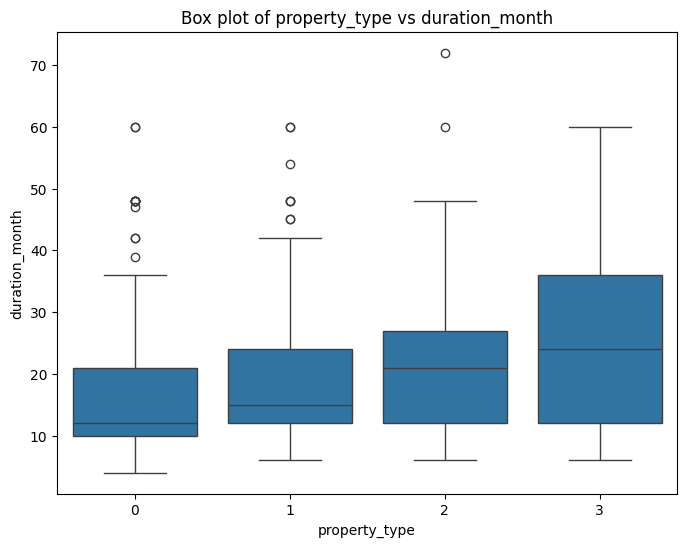

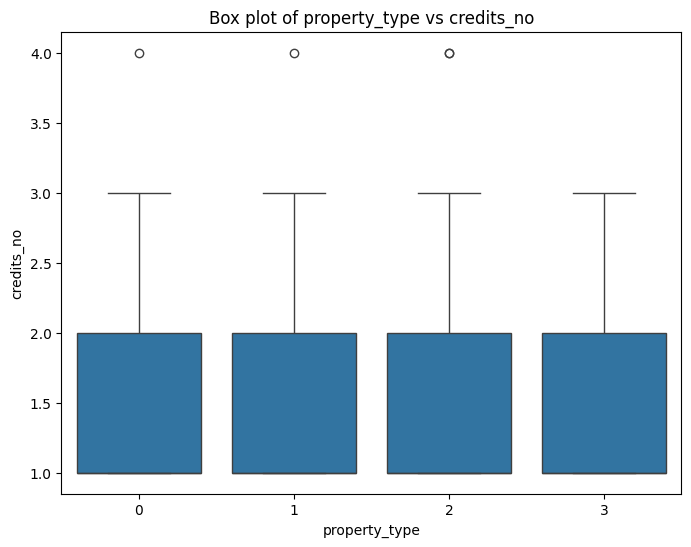

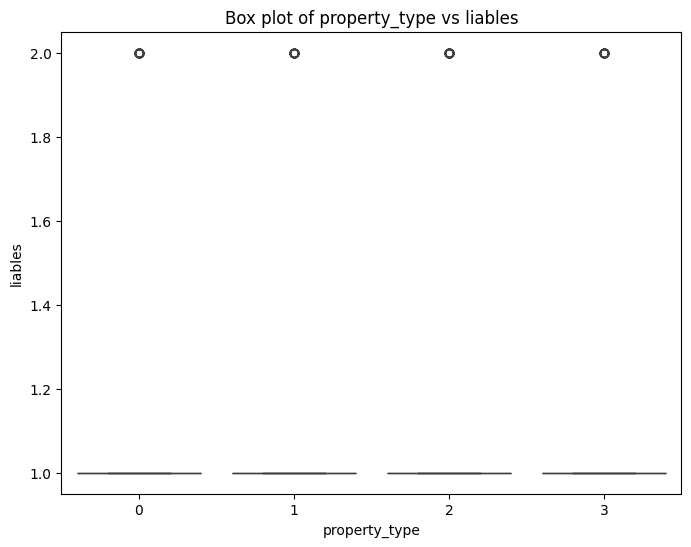

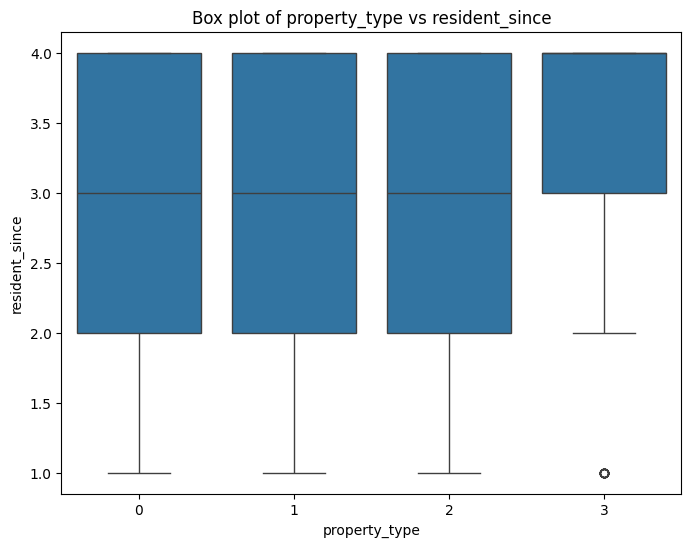

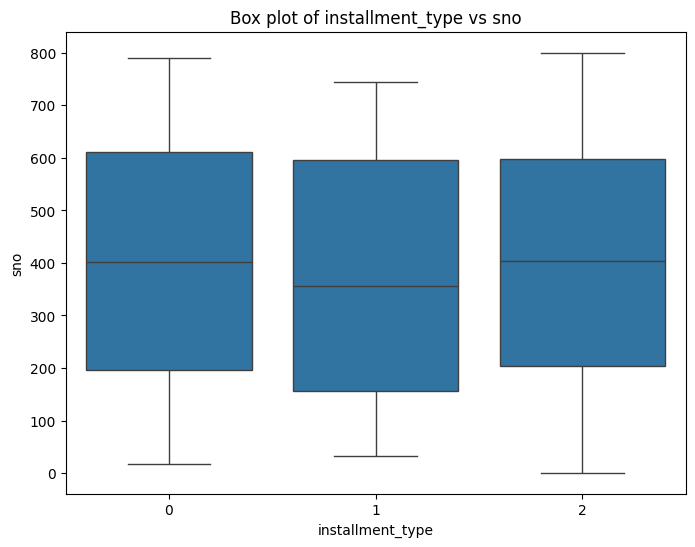

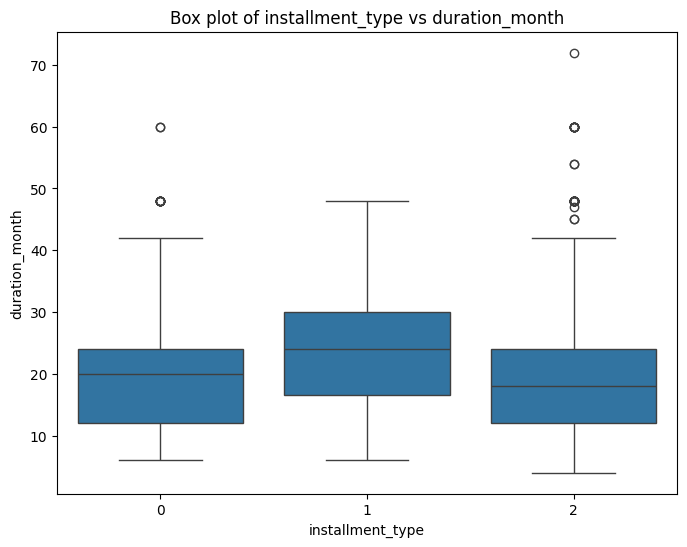

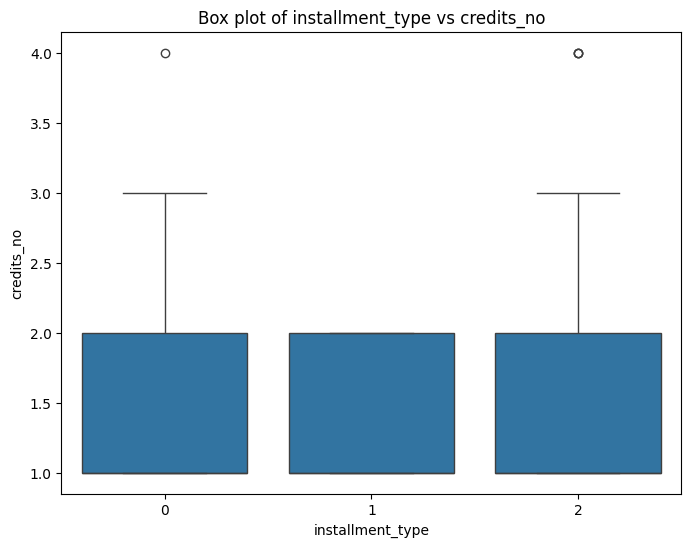

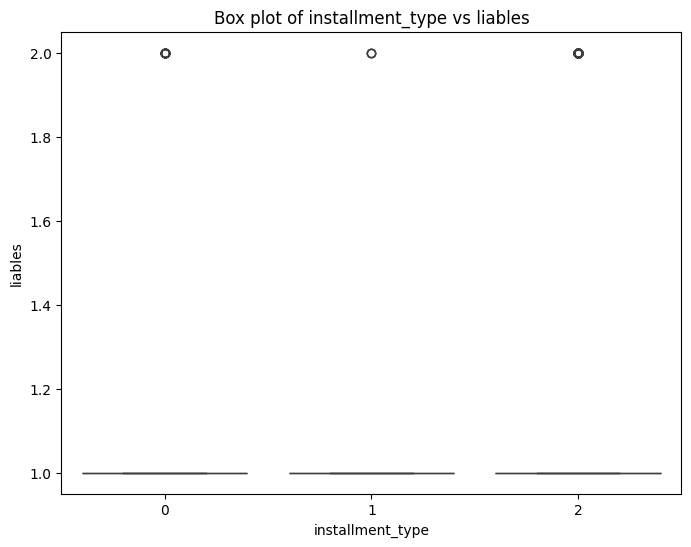

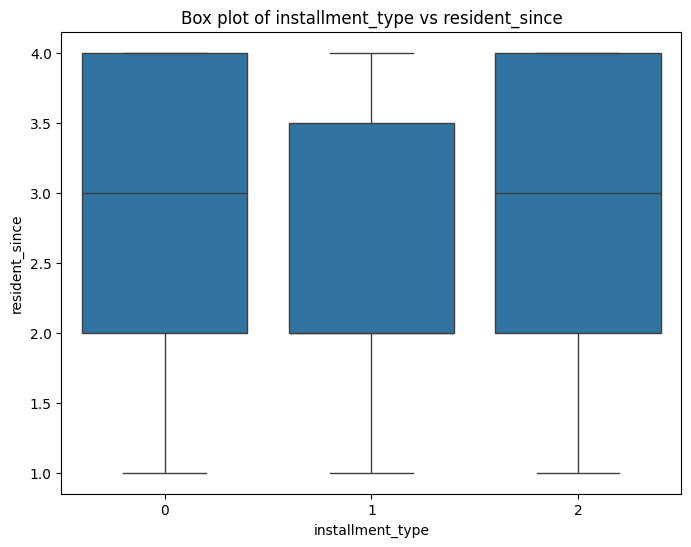

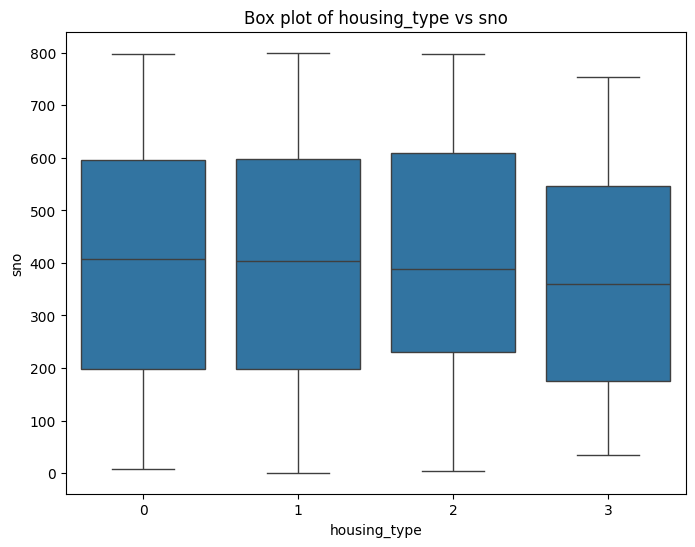

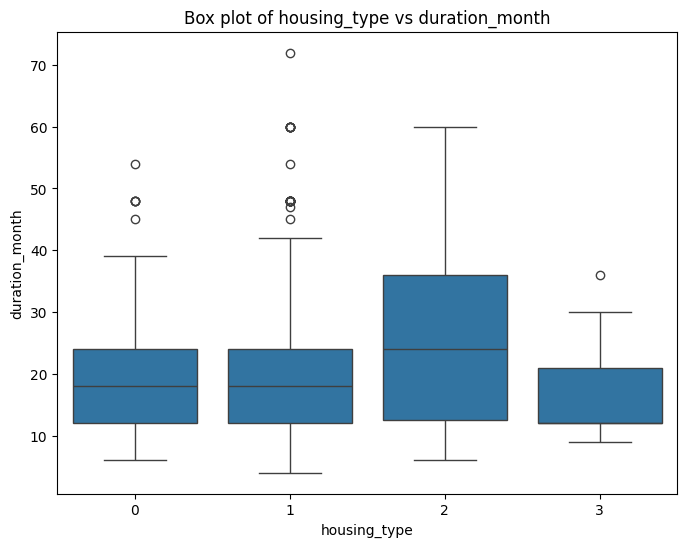

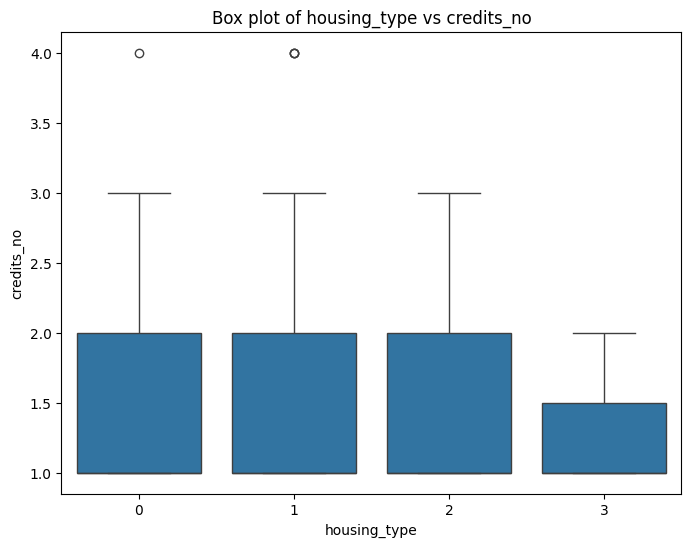

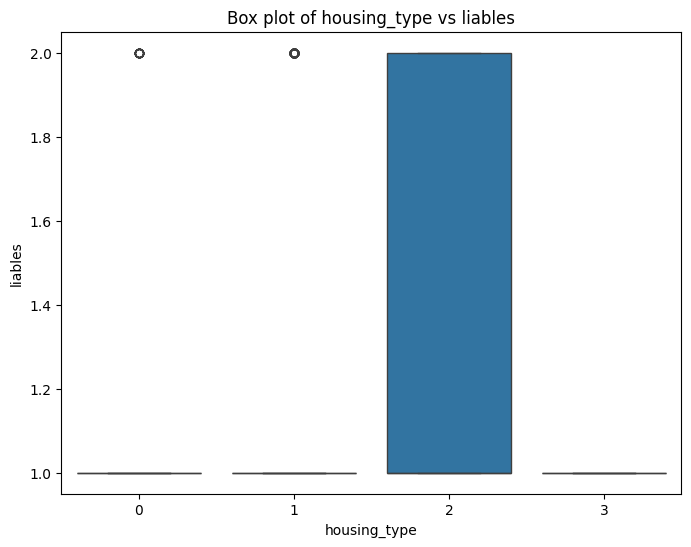

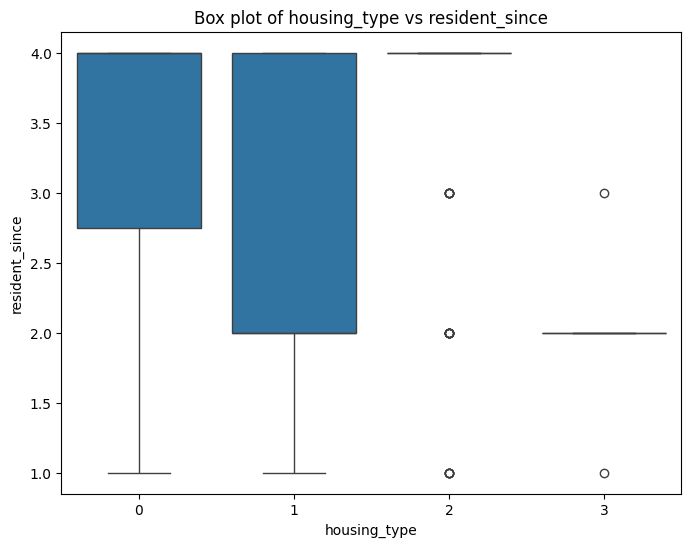

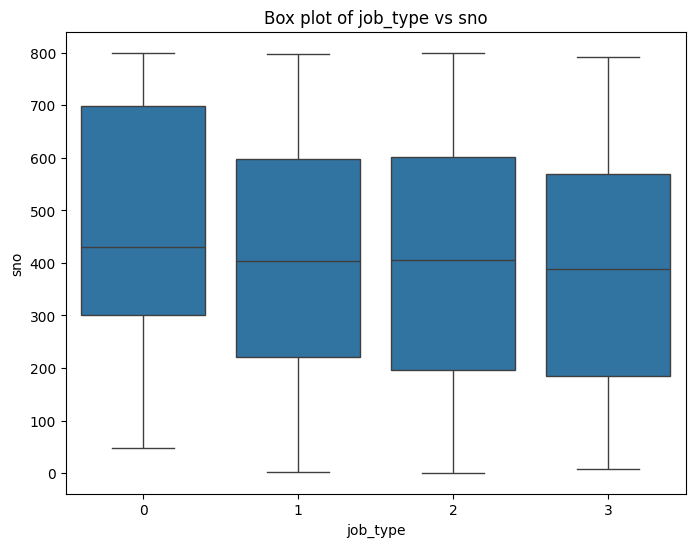

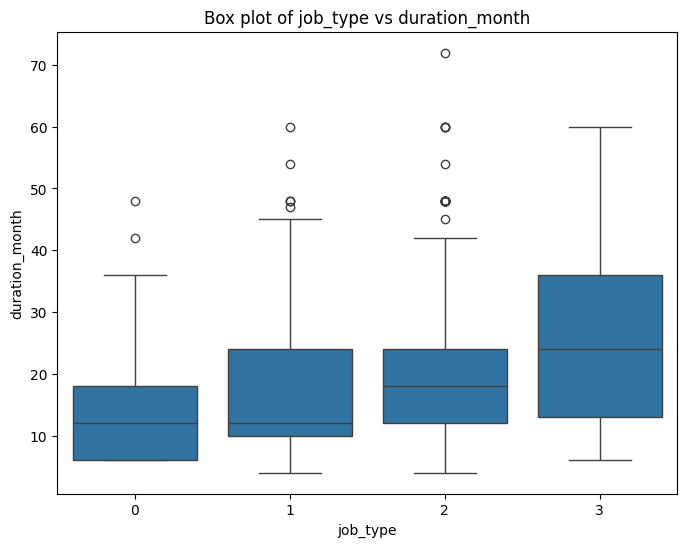

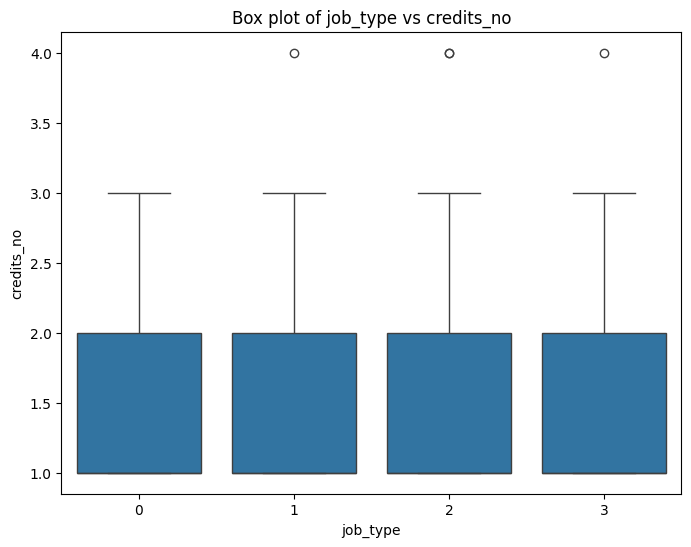

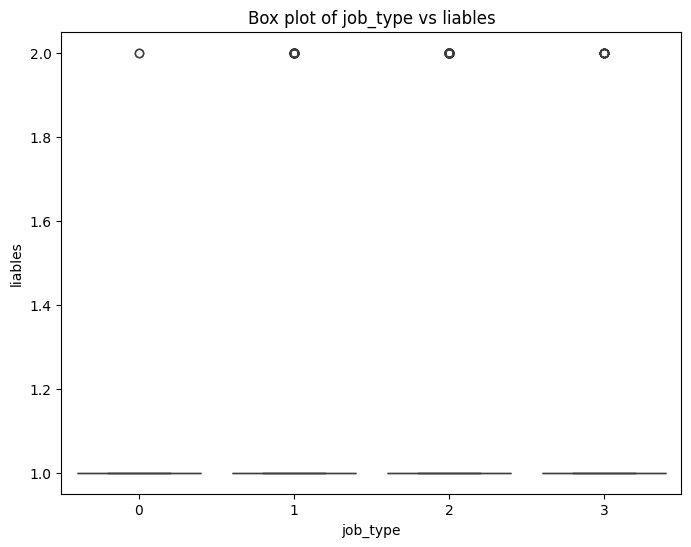

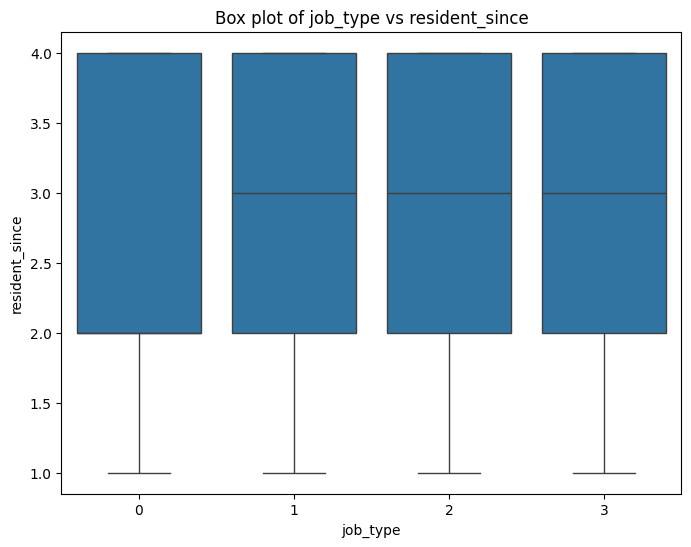

In [ ]:

# Numeric-Numeric relationships
# Scatter plot matrix
pd.plotting.scatter_matrix(df[numeric_features], figsize=(12, 12))
plt.suptitle("Scatter Plot Matrix of Numeric Features")
plt.show()

# Correlation matrix
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Categorical-Categorical relationships
# Create contingency tables
for feature1 in categorical_features:
    for feature2 in categorical_features:
        if feature1 != feature2:
            contingency_table = pd.crosstab(df[feature1], df[feature2])
            print("\nContingency table for {} vs {}".format(feature1, feature2))
            print(contingency_table)
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            print("Chi-square test p-value:", p)

# Numeric-Categorical relationships
# Box plot of numeric features vs categorical features
for feature in categorical_features:
    for num_feature in numeric_features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=feature, y=num_feature, data=df)
        plt.title("Box plot of {} vs {}".format(feature, num_feature))
        plt.show()

# **SPLITTING OF DATA**

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df.drop("Group_no", axis="columns")
y = df['Group_no']

# Split the data into training and testing sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **MODEL EVALUATION FUNCTION**

In [ ]:
# Initialize models including SVM
models = [
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Extra Trees', ExtraTreesClassifier()),
    ('SVM', SVC())
]

# Define parameter grid for SVM
svm_param_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


# **CLASSIFICATION MODELS**

In [ ]:
# Train and evaluate models including SVM
results = {}
for name, model in models:
    if name == 'SVM':
        random_search_svm = RandomizedSearchCV(estimator=model, param_distributions=svm_param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)
        random_search_svm.fit(X_train_scaled, y_train)
        best_params_svm = random_search_svm.best_params_
        model.set_params(**best_params_svm)

        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")
    best_model_name = max(results, key=results.get)
best_model =[model for model in models if model[0] == best_model_name][0][1]


Random Forest Accuracy: 0.675
Gradient Boosting Accuracy: 0.60625
AdaBoost Accuracy: 0.625
Extra Trees Accuracy: 0.63125


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVM Accuracy: 0.65


# **MODEL SELECTION**

In [ ]:
# Evaluate the best model
y_pred_best = best_model.predict(X_test_scaled)
best_model_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Model ({best_model_name}) Accuracy: {best_model_accuracy}")

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Best Model (Random Forest) Accuracy: 0.675


In [ ]:
# Apply Random Over Sampling to the training data
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_scaled, y)

# Apply Random Under Sampling to the training data
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_ros, y_ros)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_rus, y_rus)

# Apply ADASYN to the training data
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_smote, y_smote)

# Apply Cluster Centroids under sampling to the training data
cc = ClusterCentroids(random_state=42)
X_cc, y_cc = cc.fit_resample(X_adasyn, y_adasyn)

# Apply Tomek Links under sampling to the training data
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_cc, y_cc)

# Split the augmented data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=42, stratify=y_tl)

# Initialize and train the RandomForest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Multiple Data Augmentation Methods: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:178: ConvergenceWarning: Number of distinct clusters (254) found smaller than n_clusters (353). Possibly due to duplicate points in X.
  self.estimator_.fit(_safe_indexing(X, target_class_indices))


Test Accuracy with Multiple Data Augmentation Methods: 0.828125


# **APPLICATION ON TEST DATASET**

In [ ]:

# Load the test dataset
test_df = pd.read_csv('/content/sample_data/C&T test dataset (1).csv',usecols=['sno','acc_info','duration_month','credit_history','purpose','savings_acc','employment_st','personal_status','gurantors','resident_since','property_type','installment_type','housing_type','credits_no','job_type','liables'])


test_df.dropna(inplace=True)
test_X = test_df

# Convert categorical variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
for col in test_X.columns:
    if test_X[col].dtype == 'object':
        test_X[col] = label_encoder.fit_transform(test_X[col])

# Feature scaling
scaler = StandardScaler()
test_X_scaled = scaler.fit_transform(test_X)

# Make predictions on the test set
y_pred = rf_classifier.predict(test_X_scaled)

# Create a DataFrame with sno and predicted group_no
result_df = pd.DataFrame({'Serial number': test_df['sno'], 'Group_no': y_pred})



# **CREATING SUBMISSION FILE**

In [ ]:
# Write the result to a CSV file
result_df.to_csv('SUBMISSION.csv', index=False)